### Задачи

Задачи данного ноутбука:

1. Проверить правильно ли установилось окружение, проверим на дефолтном туториале из библиотеки `mmsetection`.

2. Подключить кастомный датасет `COCO`.

3. Подключить другую модель из репозитория `mmdetection`.

### Проверка окружения

Проверим какая версия `python` используется в ядре.

In [5]:
import sys
!{sys.executable} -V

Python 3.8.10


Проверим доступна ли `gpu`, верно ли встали драйвера.

In [6]:
import torch
torch.cuda.is_available(), torch.__version__

(True, '1.10.0+cu102')

### Install mmdetection

**Установку делаю через терминал**

Добавить в `poetry` библиотеку `mmcv-full`, причём необходимо добавить версию с версией куды и pytorch, как у нас установлено в окружении.

`pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/{cu_version}/{torch_version}/index.html`

Please replace {cu_version} and {torch_version} in the url to your desired one. For example, to install the latest mmcv-full with CUDA 11.1 and PyTorch 1.9.0, use the following command:

`pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html`

Посмотрим какое версии cuda и pytorch в окружении.

In [6]:
import torch
torch.cuda.is_available(), torch.__version__

(False, '1.10.2+cu102')

Необходимо добавить в `bash` скрипт строчку для устновки, т.к. мы устанавливаем те зависимости, которые не можем установить используя poetry, через `bash` оболочку.

In [5]:
#pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu102/torch1.10.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu102/torch1.10.0/index.html
     |████████████████████████████████| 59.7 MB 21 kB/s              
     |████████████████████████████████| 190 kB 1.3 MB/s            
Note: you may need to restart the kernel to use updated packages.


**В файле `install_mdetection.sh` все настроено для установки, необходимо его только запустить, запускаю из терминала.**

Переходим в папку, где находится файл `install_mmdetection.sh` и вбиваем команду.

In [1]:
!bash '../install_mmdetection.sh'

Looking in links: https://download.openmmlab.com/mmcv/dist/cu102/torch1.10.0/index.html
Cloning into 'mmdetection'...
remote: Enumerating objects: 22503, done.
remote: Total 22503 (delta 0), reused 0 (delta 0), pack-reused 22503
Receiving objects: 100% (22503/22503), 25.52 MiB | 4.59 MiB/s, done.
Resolving deltas: 100% (15754/15754), done.
Obtaining file:///home/jovyan/work/gpnl/notebooks/mmdetection
     |████████████████████████████████| 106 kB 1.3 MB/s eta 0:00:01
  Using cached Cython-0.29.26-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for pycocotools: filename=pycocotools-2.0.3-cp38-cp38-linux_x86_64.whl size=311597 sha256=3dbe749158d1950efa10f6be2e3ae2ce84b5d5b84e7b3faa7abffce0d670ec50
  Stored in directory: /home/jovyan/.cache/pip/wheels/59/5b/26/04441bc1820bf3622e0ea8616bef01b02cad3415ad880b834a
Successfully built pycocotools
  Running setup.py develop for mmdet


Перезагружаем `kernel`.

In [7]:
import mmdet
print(mmdet.__version__)

2.22.0


Обратим внимание, что в итоге у нас версии куды совпадают в окружении и в `mmcv-full`. Все должно работать.

In [8]:
# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

10.2
GCC 7.3


### Проверить окружение

Проверим правильно установилось у нас окржение. Для этого запустим оригинальный туториал, который работает на google colab. Если все работает, тогда будем пробовать подключать кастомный датасет, после этого попробуем подключить другую модель из репозитория `mmdetection`.

In [9]:
!mkdir ./mmdetection/checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth \
      -O ./mmdetection/checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth

--2022-03-02 15:32:35--  https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.233
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177867103 (170M) [application/octet-stream]
Saving to: ‘./mmdetection/checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’

./mmdetection/check 100%[===================>] 169.63M  10.8MB/s    in 16s     

2022-03-02 15:32:52 (10.6 MB/s) - ‘./mmdetection/checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’ saved [177867103/177867103]



In [10]:
device = 'cuda:3'

In [11]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Choose to use a config and initialize the detector
config = './mmdetection/configs/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco.py'
# Setup a checkpoint file to load
checkpoint = './mmdetection/checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'
# initialize the detector
model = init_detector(config, checkpoint, device=device)

load checkpoint from local path: ./mmdetection/checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth


In [12]:
# Use the detector to do inference
img = './mmdetection/demo/demo.jpg'
result = inference_detector(model, img)

/home/jovyan/.cache/pypoetry/virtualenvs/samolet-MBFNe6Xf-py3.8/lib/python3.8/site-packages/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


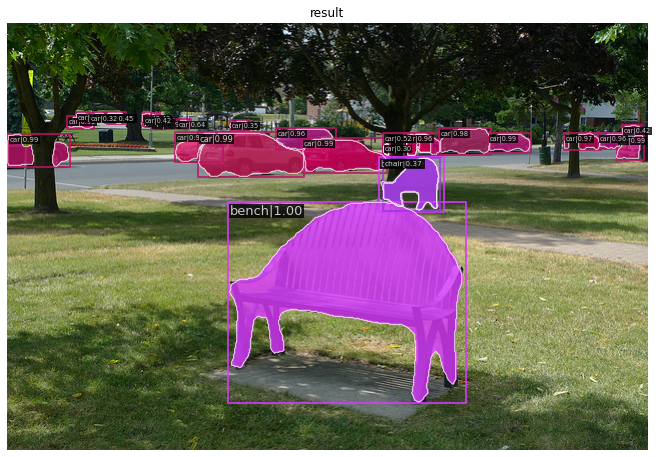

In [13]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)

Скачаем кастомный датасет и подключим его.

In [14]:
# download, decompress the data
!wget https://download.openmmlab.com/mmdetection/data/kitti_tiny.zip
!unzip kitti_tiny.zip > /dev/null

--2022-03-02 15:33:16--  https://download.openmmlab.com/mmdetection/data/kitti_tiny.zip
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.233
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6918271 (6.6M) [application/zip]
Saving to: ‘kitti_tiny.zip’

kitti_tiny.zip      100%[===================>]   6.60M  7.37MB/s    in 0.9s    

2022-03-02 15:33:18 (7.37 MB/s) - ‘kitti_tiny.zip’ saved [6918271/6918271]



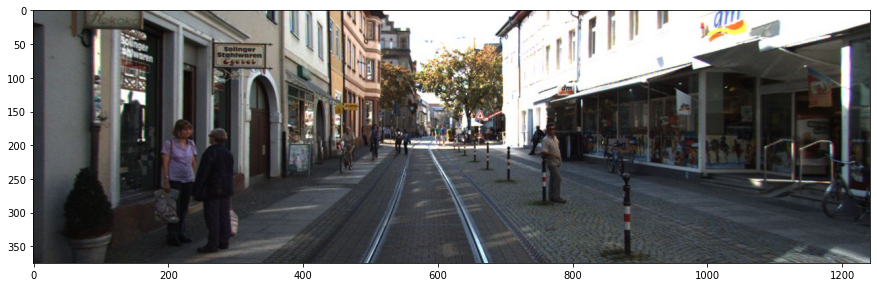

In [15]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('kitti_tiny/training/image_2/000073.jpeg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [16]:
import copy
import os.path as osp

import mmcv
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

@DATASETS.register_module()
class KittiTinyDataset(CustomDataset):

    CLASSES = ('Car', 'Pedestrian', 'Cyclist')

    def load_annotations(self, ann_file):
        cat2label = {k: i for i, k in enumerate(self.CLASSES)}
        # load image list from file
        image_list = mmcv.list_from_file(self.ann_file)
    
        data_infos = []
        # convert annotations to middle format
        for image_id in image_list:
            filename = f'{self.img_prefix}/{image_id}.jpeg'
            image = mmcv.imread(filename)
            height, width = image.shape[:2]
    
            data_info = dict(filename=f'{image_id}.jpeg', width=width, height=height)
    
            # load annotations
            label_prefix = self.img_prefix.replace('image_2', 'label_2')
            lines = mmcv.list_from_file(osp.join(label_prefix, f'{image_id}.txt'))
    
            content = [line.strip().split(' ') for line in lines]
            bbox_names = [x[0] for x in content]
            bboxes = [[float(info) for info in x[4:8]] for x in content]
    
            gt_bboxes = []
            gt_labels = []
            gt_bboxes_ignore = []
            gt_labels_ignore = []
    
            # filter 'DontCare'
            for bbox_name, bbox in zip(bbox_names, bboxes):
                if bbox_name in cat2label:
                    gt_labels.append(cat2label[bbox_name])
                    gt_bboxes.append(bbox)
                else:
                    gt_labels_ignore.append(-1)
                    gt_bboxes_ignore.append(bbox)

            data_anno = dict(
                bboxes=np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                labels=np.array(gt_labels, dtype=np.long),
                bboxes_ignore=np.array(gt_bboxes_ignore,
                                       dtype=np.float32).reshape(-1, 4),
                labels_ignore=np.array(gt_labels_ignore, dtype=np.long))

            data_info.update(ann=data_anno)
            data_infos.append(data_info)

        return data_infos

In [17]:
from mmcv import Config
cfg = Config.fromfile('./mmdetection/configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py')

**Важно!** 

Важная донастройка, необходимо в конфигурации установить `cfg['data']['workers_per_gpu'] = 0`, это параметр для `from torch.utils.data import DataLoader` `Dataloader(num_workers=0)`, параметр `num_workers` отвечает за распаралеливание потоков сборки батча, указывая позитивное число, мы указываем в сколько потоков распаралелить вычисления. В `mset.space` по какой-то причине распаралеливание не работает и нужно его отключить, установив параметр к нулю.

Подробнее: [здесь](https://pytorch.org/docs/stable/data.html).

In [18]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'KittiTinyDataset'
cfg.data_root = 'kitti_tiny/'

cfg.data.test.type = 'KittiTinyDataset'
cfg.data.test.data_root = 'kitti_tiny/'
cfg.data.test.ann_file = 'train.txt'
cfg.data.test.img_prefix = 'training/image_2'

cfg.data.train.type = 'KittiTinyDataset'
cfg.data.train.data_root = 'kitti_tiny/'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'training/image_2'

cfg.data.val.type = 'KittiTinyDataset'
cfg.data.val.data_root = 'kitti_tiny/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'training/image_2'

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 3
# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = '../mmdetection/checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = [3]

cfg['data']['workers_per_gpu'] = 0

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=False),
        norm_eval=True,
        style='caffe',
        init_cfg=dict(
            type='Pretrained',
            checkpoint='open-mmlab://detectron2/resnet50_caffe')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='Cro

In [19]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector


# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

/tmp/ipykernel_73398/765367399.py:53: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels=np.array(gt_labels, dtype=np.long),
/tmp/ipykernel_73398/765367399.py:56: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for whic

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 25/25, 10.6 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2022-03-02 15:36:20,661 - mmdet - INFO - 
+------------+-----+------+--------+-------+
| class      | gts | dets | recall | ap    |
+------------+-----+------+--------+-------+
| Car        | 62  | 123  | 0.952  | 0.870 |
| Pedestrian | 13  | 38   | 0.846  | 0.764 |
| Cyclist    | 7   | 37   | 0.571  | 0.109 |
+------------+-----+------+--------+-------+
| mAP        |     |      |        | 0.581 |
+------------+-----+------+--------+-------+
2022-03-02 15:36:20,753 - mmdet - INFO - Epoch(val) [12][25]	AP50: 0.5810, mAP: 0.5809


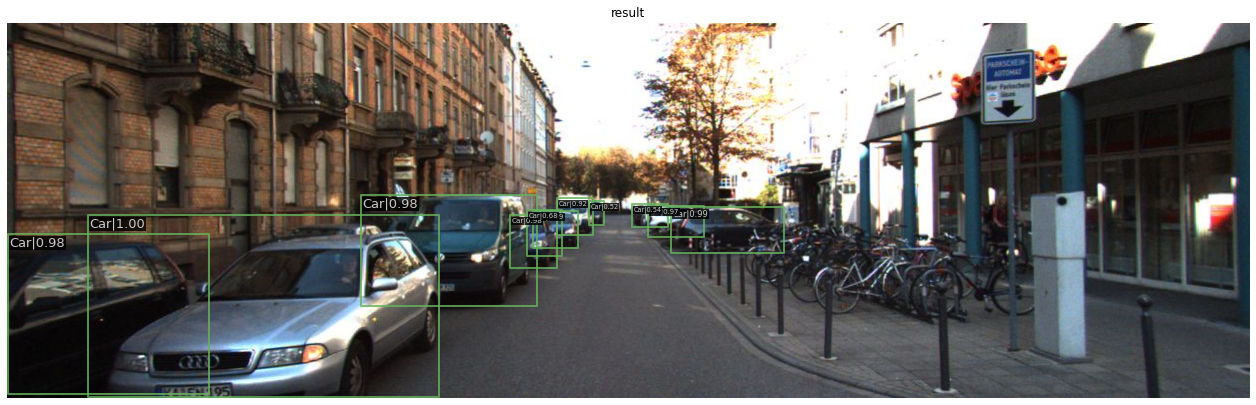

In [20]:
from mmdet.apis import inference_detector, show_result_pyplot

img = mmcv.imread('kitti_tiny/training/image_2/000068.jpeg')

model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result)

Установленное окружение работает!

In [4]:
# -*- coding:utf-8 -*-
    
from __future__ import print_function
from pycocotools.coco import COCO
import os, sys, zipfile
import urllib.request
import shutil
import numpy as np
# import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import json
     
json_file = './dataset/annotations/instances_default.json' # # Аннотации типа Object Instance
# person_keypoints_val2017.json # Формат аннотации ключевой точки объекта
# captions_val2017.json # Формат аннотации подписи к изображению
     
data = json.load(open(json_file,'r'))

# data2 = {}
# data2['info'] = data ['info']
# data2['licenses'] = data['licenses']
# data2['images'] = data['images']
# data2['categories'] = data['categories']
# annotation = []
     
data_train = {}
data_train['info'] = data['info']
data_train['licenses'] = data['licenses']
data_train['images'] = data ['images'][:-15]
data_train['categories'] = data['categories']
annotation_train = []

# for im in data_2['images']:
#     print(im['id'])

# count0 = 0
# count1 = 0                     
# count2 = 0                     
# count3 = 0                     
# count4 = 0
# count5 = 0

# print(data['annotations'][0])
                     
# for ann in data['annotations']:
#     if ann['category_id'] == 1:
#         count0 += 1
#     if ann['category_id'] == 2:
#         count1 += 1
#     if ann['category_id'] == 3:
#         count2 += 1
#     if ann['category_id'] == 4:
#         count3 += 1
#     if ann['category_id'] == 5:
#         count4 += 1                 
#     if ann['category_id'] == 6:
#         count5 += 1
    
# print(count0, ' ')
# print(count1, ' ')
# print(count2, ' ')                     
# print(count3, ' ')                     
# print(count4, ' ')                     
# print(count5, ' ')     

# Найти все свои объекты по imgID

for i in range(0, 284):
    imgID = data_train['images'][i]['id']
    for ann in data['annotations']:
        if ann['image_id'] == imgID:
            annotation_train.append(ann)

data_train['annotations'] = annotation_train
     
# Сохранить в новый файл JSON для удобного просмотра характеристик данных
json.dump(data_train, open('./dataset/annotations/train_285.json', 'w')) # отступ = 4 более красивых дисплея

data_val = {}
data_val['info'] = data['info']
data_val['licenses'] = data['licenses']
data_val['images'] = data ['images'][285:300]
data_val['categories'] = data['categories']
annotation_val = []

# print(len(data_val['images']))
# print(data_val['images'][0])

for i in range(0, 14):
    imgID = data_val['images'][i]['id']
    for ann in data['annotations']:
        if ann['image_id'] == imgID:
            annotation_val.append(ann)
            
data_val['annotations'] = annotation_val
json.dump(data_val, open('./dataset/annotations/val_15.json', 'w'))

### Кастомный датасет

Теперь попробуем установить кастомный датасет. В этой библиотеки установлен стандартный датасет `CocoDataset`. Мы тоже используем готовый датасет формата `COCO`, но кастомный датасет нам все равно нужно будет переписать, т.к. мы испольуем кастомные классы (название и количество), это нужно отразить в датасете. Поэтому возьмем шаблон из бибиотеки и укажем названия классов которые у нас есть.

Откуда будем брать шаблон: [здесь](https://github.com/open-mmlab/mmdetection/blob/bde7b4b7eea9dd6ee91a486c6996b2d68662366d/mmdet/datasets/coco.py).

In [1]:
# Copyright (c) OpenMMLab. All rights reserved.
import itertools
import logging
import os.path as osp
import tempfile
import warnings
from collections import OrderedDict

import mmcv
import numpy as np
from mmcv.utils import print_log
from terminaltables import AsciiTable

from mmdet.core import eval_recalls

from mmdet.datasets.api_wrappers import COCO, COCOeval
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

Изменим атрибут `CLASSES`, указав название классов, которые есть у нас.

In [2]:
@DATASETS.register_module()
class GPNL(CustomDataset):

    CLASSES = ('empty', 'beton', 'finish', 'blocks', 'window', 'other')

    def load_annotations(self, ann_file):
        """Load annotation from COCO style annotation file.
        Args:
            ann_file (str): Path of annotation file.
        Returns:
            list[dict]: Annotation info from COCO api.
        """

        self.coco = COCO(ann_file)
        # The order of returned `cat_ids` will not
        # change with the order of the CLASSES
        self.cat_ids = self.coco.get_cat_ids(cat_names=self.CLASSES)

        self.cat2label = {cat_id: i for i, cat_id in enumerate(self.cat_ids)}
        self.img_ids = self.coco.get_img_ids()
        data_infos = []
        total_ann_ids = []
        for i in self.img_ids:
            info = self.coco.load_imgs([i])[0]
            info['filename'] = info['file_name']
            data_infos.append(info)
            ann_ids = self.coco.get_ann_ids(img_ids=[i])
            total_ann_ids.extend(ann_ids)
        assert len(set(total_ann_ids)) == len(
            total_ann_ids), f"Annotation ids in '{ann_file}' are not unique!"
        return data_infos

    def get_ann_info(self, idx):
        """Get COCO annotation by index.
        Args:
            idx (int): Index of data.
        Returns:
            dict: Annotation info of specified index.
        """

        img_id = self.data_infos[idx]['id']
        ann_ids = self.coco.get_ann_ids(img_ids=[img_id])
        ann_info = self.coco.load_anns(ann_ids)
        return self._parse_ann_info(self.data_infos[idx], ann_info)

    def get_cat_ids(self, idx):
        """Get COCO category ids by index.
        Args:
            idx (int): Index of data.
        Returns:
            list[int]: All categories in the image of specified index.
        """

        img_id = self.data_infos[idx]['id']
        ann_ids = self.coco.get_ann_ids(img_ids=[img_id])
        ann_info = self.coco.load_anns(ann_ids)
        return [ann['category_id'] for ann in ann_info]

    def _filter_imgs(self, min_size=32):
        """Filter images too small or without ground truths."""
        valid_inds = []
        # obtain images that contain annotation
        ids_with_ann = set(_['image_id'] for _ in self.coco.anns.values())
        # obtain images that contain annotations of the required categories
        ids_in_cat = set()
        for i, class_id in enumerate(self.cat_ids):
            ids_in_cat |= set(self.coco.cat_img_map[class_id])
        # merge the image id sets of the two conditions and use the merged set
        # to filter out images if self.filter_empty_gt=True
        ids_in_cat &= ids_with_ann

        valid_img_ids = []
        for i, img_info in enumerate(self.data_infos):
            img_id = self.img_ids[i]
            if self.filter_empty_gt and img_id not in ids_in_cat:
                continue
            if min(img_info['width'], img_info['height']) >= min_size:
                valid_inds.append(i)
                valid_img_ids.append(img_id)
        self.img_ids = valid_img_ids
        return valid_inds

    def _parse_ann_info(self, img_info, ann_info):
        """Parse bbox and mask annotation.
        Args:
            ann_info (list[dict]): Annotation info of an image.
            with_mask (bool): Whether to parse mask annotations.
        Returns:
            dict: A dict containing the following keys: bboxes, bboxes_ignore,\
                labels, masks, seg_map. "masks" are raw annotations and not \
                decoded into binary masks.
        """
        gt_bboxes = []
        gt_labels = []
        gt_bboxes_ignore = []
        gt_masks_ann = []
        for i, ann in enumerate(ann_info):
            if ann.get('ignore', False):
                continue
            x1, y1, w, h = ann['bbox']
            inter_w = max(0, min(x1 + w, img_info['width']) - max(x1, 0))
            inter_h = max(0, min(y1 + h, img_info['height']) - max(y1, 0))
            if inter_w * inter_h == 0:
                continue
            if ann['area'] <= 0 or w < 1 or h < 1:
                continue
            if ann['category_id'] not in self.cat_ids:
                continue
            bbox = [x1, y1, x1 + w, y1 + h]
            if ann.get('iscrowd', False):
                gt_bboxes_ignore.append(bbox)
            else:
                gt_bboxes.append(bbox)
                gt_labels.append(self.cat2label[ann['category_id']])
                gt_masks_ann.append(ann.get('segmentation', None))

        if gt_bboxes:
            gt_bboxes = np.array(gt_bboxes, dtype=np.float32)
            gt_labels = np.array(gt_labels, dtype=np.int64)
        else:
            gt_bboxes = np.zeros((0, 4), dtype=np.float32)
            gt_labels = np.array([], dtype=np.int64)

        if gt_bboxes_ignore:
            gt_bboxes_ignore = np.array(gt_bboxes_ignore, dtype=np.float32)
        else:
            gt_bboxes_ignore = np.zeros((0, 4), dtype=np.float32)

        seg_map = img_info['filename'].replace('jpg', 'png')

        ann = dict(
            bboxes=gt_bboxes,
            labels=gt_labels,
            bboxes_ignore=gt_bboxes_ignore,
            masks=gt_masks_ann,
            seg_map=seg_map)

        return ann

    def xyxy2xywh(self, bbox):
        """Convert ``xyxy`` style bounding boxes to ``xywh`` style for COCO
        evaluation.
        Args:
            bbox (numpy.ndarray): The bounding boxes, shape (4, ), in
                ``xyxy`` order.
        Returns:
            list[float]: The converted bounding boxes, in ``xywh`` order.
        """

        _bbox = bbox.tolist()
        return [
            _bbox[0],
            _bbox[1],
            _bbox[2] - _bbox[0],
            _bbox[3] - _bbox[1],
        ]

    def _proposal2json(self, results):
        """Convert proposal results to COCO json style."""
        json_results = []
        for idx in range(len(self)):
            img_id = self.img_ids[idx]
            bboxes = results[idx]
            for i in range(bboxes.shape[0]):
                data = dict()
                data['image_id'] = img_id
                data['bbox'] = self.xyxy2xywh(bboxes[i])
                data['score'] = float(bboxes[i][4])
                data['category_id'] = 1
                json_results.append(data)
        return json_results

    def _det2json(self, results):
        """Convert detection results to COCO json style."""
        json_results = []
        for idx in range(len(self)):
            img_id = self.img_ids[idx]
            result = results[idx]
            for label in range(len(result)):
                bboxes = result[label]
                for i in range(bboxes.shape[0]):
                    data = dict()
                    data['image_id'] = img_id
                    data['bbox'] = self.xyxy2xywh(bboxes[i])
                    data['score'] = float(bboxes[i][4])
                    data['category_id'] = self.cat_ids[label]
                    json_results.append(data)
        return json_results

    def _segm2json(self, results):
        """Convert instance segmentation results to COCO json style."""
        bbox_json_results = []
        segm_json_results = []
        for idx in range(len(self)):
            img_id = self.img_ids[idx]
            det, seg = results[idx]
            for label in range(len(det)):
                # bbox results
                bboxes = det[label]
                for i in range(bboxes.shape[0]):
                    data = dict()
                    data['image_id'] = img_id
                    data['bbox'] = self.xyxy2xywh(bboxes[i])
                    data['score'] = float(bboxes[i][4])
                    data['category_id'] = self.cat_ids[label]
                    bbox_json_results.append(data)

                # segm results
                # some detectors use different scores for bbox and mask
                if isinstance(seg, tuple):
                    segms = seg[0][label]
                    mask_score = seg[1][label]
                else:
                    segms = seg[label]
                    mask_score = [bbox[4] for bbox in bboxes]
                for i in range(bboxes.shape[0]):
                    data = dict()
                    data['image_id'] = img_id
                    data['bbox'] = self.xyxy2xywh(bboxes[i])
                    data['score'] = float(mask_score[i])
                    data['category_id'] = self.cat_ids[label]
                    if isinstance(segms[i]['counts'], bytes):
                        segms[i]['counts'] = segms[i]['counts'].decode()
                    data['segmentation'] = segms[i]
                    segm_json_results.append(data)
        return bbox_json_results, segm_json_results

    def results2json(self, results, outfile_prefix):
        """Dump the detection results to a COCO style json file.
        There are 3 types of results: proposals, bbox predictions, mask
        predictions, and they have different data types. This method will
        automatically recognize the type, and dump them to json files.
        Args:
            results (list[list | tuple | ndarray]): Testing results of the
                dataset.
            outfile_prefix (str): The filename prefix of the json files. If the
                prefix is "somepath/xxx", the json files will be named
                "somepath/xxx.bbox.json", "somepath/xxx.segm.json",
                "somepath/xxx.proposal.json".
        Returns:
            dict[str: str]: Possible keys are "bbox", "segm", "proposal", and \
                values are corresponding filenames.
        """
        result_files = dict()
        if isinstance(results[0], list):
            json_results = self._det2json(results)
            result_files['bbox'] = f'{outfile_prefix}.bbox.json'
            result_files['proposal'] = f'{outfile_prefix}.bbox.json'
            mmcv.dump(json_results, result_files['bbox'])
        elif isinstance(results[0], tuple):
            json_results = self._segm2json(results)
            result_files['bbox'] = f'{outfile_prefix}.bbox.json'
            result_files['proposal'] = f'{outfile_prefix}.bbox.json'
            result_files['segm'] = f'{outfile_prefix}.segm.json'
            mmcv.dump(json_results[0], result_files['bbox'])
            mmcv.dump(json_results[1], result_files['segm'])
        elif isinstance(results[0], np.ndarray):
            json_results = self._proposal2json(results)
            result_files['proposal'] = f'{outfile_prefix}.proposal.json'
            mmcv.dump(json_results, result_files['proposal'])
        else:
            raise TypeError('invalid type of results')
        return result_files

    def fast_eval_recall(self, results, proposal_nums, iou_thrs, logger=None):
        gt_bboxes = []
        for i in range(len(self.img_ids)):
            ann_ids = self.coco.get_ann_ids(img_ids=self.img_ids[i])
            ann_info = self.coco.load_anns(ann_ids)
            if len(ann_info) == 0:
                gt_bboxes.append(np.zeros((0, 4)))
                continue
            bboxes = []
            for ann in ann_info:
                if ann.get('ignore', False) or ann['iscrowd']:
                    continue
                x1, y1, w, h = ann['bbox']
                bboxes.append([x1, y1, x1 + w, y1 + h])
            bboxes = np.array(bboxes, dtype=np.float32)
            if bboxes.shape[0] == 0:
                bboxes = np.zeros((0, 4))
            gt_bboxes.append(bboxes)

        recalls = eval_recalls(
            gt_bboxes, results, proposal_nums, iou_thrs, logger=logger)
        ar = recalls.mean(axis=1)
        return ar

    def format_results(self, results, jsonfile_prefix=None, **kwargs):
        """Format the results to json (standard format for COCO evaluation).
        Args:
            results (list[tuple | numpy.ndarray]): Testing results of the
                dataset.
            jsonfile_prefix (str | None): The prefix of json files. It includes
                the file path and the prefix of filename, e.g., "a/b/prefix".
                If not specified, a temp file will be created. Default: None.
        Returns:
            tuple: (result_files, tmp_dir), result_files is a dict containing \
                the json filepaths, tmp_dir is the temporal directory created \
                for saving json files when jsonfile_prefix is not specified.
        """
        assert isinstance(results, list), 'results must be a list'
        assert len(results) == len(self), (
            'The length of results is not equal to the dataset len: {} != {}'.
            format(len(results), len(self)))

        if jsonfile_prefix is None:
            tmp_dir = tempfile.TemporaryDirectory()
            jsonfile_prefix = osp.join(tmp_dir.name, 'results')
        else:
            tmp_dir = None
        result_files = self.results2json(results, jsonfile_prefix)
        return result_files, tmp_dir

    def evaluate(self,
                 results,
                 metric='bbox',
                 logger=None,
                 jsonfile_prefix=None,
                 classwise=False,
                 proposal_nums=(100, 300, 1000),
                 iou_thrs=None,
                 metric_items=None):
        """Evaluation in COCO protocol.
        Args:
            results (list[list | tuple]): Testing results of the dataset.
            metric (str | list[str]): Metrics to be evaluated. Options are
                'bbox', 'segm', 'proposal', 'proposal_fast'.
            logger (logging.Logger | str | None): Logger used for printing
                related information during evaluation. Default: None.
            jsonfile_prefix (str | None): The prefix of json files. It includes
                the file path and the prefix of filename, e.g., "a/b/prefix".
                If not specified, a temp file will be created. Default: None.
            classwise (bool): Whether to evaluating the AP for each class.
            proposal_nums (Sequence[int]): Proposal number used for evaluating
                recalls, such as recall@100, recall@1000.
                Default: (100, 300, 1000).
            iou_thrs (Sequence[float], optional): IoU threshold used for
                evaluating recalls/mAPs. If set to a list, the average of all
                IoUs will also be computed. If not specified, [0.50, 0.55,
                0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95] will be used.
                Default: None.
            metric_items (list[str] | str, optional): Metric items that will
                be returned. If not specified, ``['AR@100', 'AR@300',
                'AR@1000', 'AR_s@1000', 'AR_m@1000', 'AR_l@1000' ]`` will be
                used when ``metric=='proposal'``, ``['mAP', 'mAP_50', 'mAP_75',
                'mAP_s', 'mAP_m', 'mAP_l']`` will be used when
                ``metric=='bbox' or metric=='segm'``.
        Returns:
            dict[str, float]: COCO style evaluation metric.
        """

        metrics = metric if isinstance(metric, list) else [metric]
        allowed_metrics = ['bbox', 'segm', 'proposal', 'proposal_fast']
        for metric in metrics:
            if metric not in allowed_metrics:
                raise KeyError(f'metric {metric} is not supported')
        if iou_thrs is None:
            iou_thrs = np.linspace(
                .5, 0.95, int(np.round((0.95 - .5) / .05)) + 1, endpoint=True)
        if metric_items is not None:
            if not isinstance(metric_items, list):
                metric_items = [metric_items]

        result_files, tmp_dir = self.format_results(results, jsonfile_prefix)

        eval_results = OrderedDict()
        cocoGt = self.coco
        for metric in metrics:
            msg = f'Evaluating {metric}...'
            if logger is None:
                msg = '\n' + msg
            print_log(msg, logger=logger)

            if metric == 'proposal_fast':
                ar = self.fast_eval_recall(
                    results, proposal_nums, iou_thrs, logger='silent')
                log_msg = []
                for i, num in enumerate(proposal_nums):
                    eval_results[f'AR@{num}'] = ar[i]
                    log_msg.append(f'\nAR@{num}\t{ar[i]:.4f}')
                log_msg = ''.join(log_msg)
                print_log(log_msg, logger=logger)
                continue

            iou_type = 'bbox' if metric == 'proposal' else metric
            if metric not in result_files:
                raise KeyError(f'{metric} is not in results')
            try:
                predictions = mmcv.load(result_files[metric])
                if iou_type == 'segm':
                    # Refer to https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocotools/coco.py#L331  # noqa
                    # When evaluating mask AP, if the results contain bbox,
                    # cocoapi will use the box area instead of the mask area
                    # for calculating the instance area. Though the overall AP
                    # is not affected, this leads to different
                    # small/medium/large mask AP results.
                    for x in predictions:
                        x.pop('bbox')
                    warnings.simplefilter('once')
                    warnings.warn(
                        'The key "bbox" is deleted for more accurate mask AP '
                        'of small/medium/large instances since v2.12.0. This '
                        'does not change the overall mAP calculation.',
                        UserWarning)
                cocoDt = cocoGt.loadRes(predictions)
            except IndexError:
                print_log(
                    'The testing results of the whole dataset is empty.',
                    logger=logger,
                    level=logging.ERROR)
                break

            cocoEval = COCOeval(cocoGt, cocoDt, iou_type)
            cocoEval.params.catIds = self.cat_ids
            cocoEval.params.imgIds = self.img_ids
            cocoEval.params.maxDets = list(proposal_nums)
            cocoEval.params.iouThrs = iou_thrs
            # mapping of cocoEval.stats
            coco_metric_names = {
                'mAP': 0,
                'mAP_50': 1,
                'mAP_75': 2,
                'mAP_s': 3,
                'mAP_m': 4,
                'mAP_l': 5,
                'AR@100': 6,
                'AR@300': 7,
                'AR@1000': 8,
                'AR_s@1000': 9,
                'AR_m@1000': 10,
                'AR_l@1000': 11
            }
            if metric_items is not None:
                for metric_item in metric_items:
                    if metric_item not in coco_metric_names:
                        raise KeyError(
                            f'metric item {metric_item} is not supported')

            if metric == 'proposal':
                cocoEval.params.useCats = 0
                cocoEval.evaluate()
                cocoEval.accumulate()
                cocoEval.summarize()
                if metric_items is None:
                    metric_items = [
                        'AR@100', 'AR@300', 'AR@1000', 'AR_s@1000',
                        'AR_m@1000', 'AR_l@1000'
                    ]

                for item in metric_items:
                    val = float(
                        f'{cocoEval.stats[coco_metric_names[item]]:.3f}')
                    eval_results[item] = val
            else:
                cocoEval.evaluate()
                cocoEval.accumulate()
                cocoEval.summarize()
                if classwise:  # Compute per-category AP
                    # Compute per-category AP
                    # from https://github.com/facebookresearch/detectron2/
                    precisions = cocoEval.eval['precision']
                    # precision: (iou, recall, cls, area range, max dets)
                    assert len(self.cat_ids) == precisions.shape[2]

                    results_per_category = []
                    for idx, catId in enumerate(self.cat_ids):
                        # area range index 0: all area ranges
                        # max dets index -1: typically 100 per image
                        nm = self.coco.loadCats(catId)[0]
                        precision = precisions[:, :, idx, 0, -1]
                        precision = precision[precision > -1]
                        if precision.size:
                            ap = np.mean(precision)
                        else:
                            ap = float('nan')
                        results_per_category.append(
                            (f'{nm["name"]}', f'{float(ap):0.3f}'))

                    num_columns = min(6, len(results_per_category) * 2)
                    results_flatten = list(
                        itertools.chain(*results_per_category))
                    headers = ['category', 'AP'] * (num_columns // 2)
                    results_2d = itertools.zip_longest(*[
                        results_flatten[i::num_columns]
                        for i in range(num_columns)
                    ])
                    table_data = [headers]
                    table_data += [result for result in results_2d]
                    table = AsciiTable(table_data)
                    print_log('\n' + table.table, logger=logger)

                if metric_items is None:
                    metric_items = [
                        'mAP', 'mAP_50', 'mAP_75', 'mAP_s', 'mAP_m', 'mAP_l'
                    ]

                for metric_item in metric_items:
                    key = f'{metric}_{metric_item}'
                    val = float(
                        f'{cocoEval.stats[coco_metric_names[metric_item]]:.3f}'
                    )
                    eval_results[key] = val
                ap = cocoEval.stats[:6]
                eval_results[f'{metric}_mAP_copypaste'] = (
                    f'{ap[0]:.3f} {ap[1]:.3f} {ap[2]:.3f} {ap[3]:.3f} '
                    f'{ap[4]:.3f} {ap[5]:.3f}')
        if tmp_dir is not None:
            tmp_dir.cleanup()
        return eval_results

In [3]:
from mmcv import Config
cfg = Config.fromfile('./mmdetection/configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py')

Посмотрим пути к датасету и сделаем по аналогии.

In [4]:
cfg['data']

{'samples_per_gpu': 2,
 'workers_per_gpu': 2,
 'train': {'type': 'CocoDataset',
  'ann_file': 'data/coco/annotations/instances_train2017.json',
  'img_prefix': 'data/coco/train2017/',
  'pipeline': [{'type': 'LoadImageFromFile'},
   {'type': 'LoadAnnotations', 'with_bbox': True},
   {'type': 'Resize',
    'img_scale': [(1333, 640),
     (1333, 672),
     (1333, 704),
     (1333, 736),
     (1333, 768),
     (1333, 800)],
    'multiscale_mode': 'value',
    'keep_ratio': True},
   {'type': 'RandomFlip', 'flip_ratio': 0.5},
   {'type': 'Normalize',
    'mean': [103.53, 116.28, 123.675],
    'std': [1.0, 1.0, 1.0],
    'to_rgb': False},
   {'type': 'Pad', 'size_divisor': 32},
   {'type': 'DefaultFormatBundle'},
   {'type': 'Collect', 'keys': ['img', 'gt_bboxes', 'gt_labels']}]},
 'val': {'type': 'CocoDataset',
  'ann_file': 'data/coco/annotations/instances_val2017.json',
  'img_prefix': 'data/coco/val2017/',
  'pipeline': [{'type': 'LoadImageFromFile'},
   {'type': 'MultiScaleFlipAug',
  

Повторим структуру датасета `coco` в папке (т.е. разложим полученный датасет по папкам, чтобы организовать нужную структуру.

```
coco
├── annotations
│   ├── train.json
│   ├── val.json
│
├── train_images
│   ├── *.json
|
├── val_images
│   ├── *.json
```

Так же в каждом датасете, есть переменная называемая `allowed_metrics` в которую записывается название метрик, по которым можно оценить качество предсказания модели. В `coco` есть только одна метрика и её нужно использовать. Поэтому дефолтные значения с метрикой не трогаем из настройки конфига убираем.

Посмотреть датасет [COCO](https://github.com/open-mmlab/mmdetection/blob/master/mmdet/datasets/coco.py).

In [5]:
cfg['evaluation']

{'interval': 1, 'metric': 'bbox'}

In [6]:
from mmdet.apis import set_random_seed

# cfg.dataset_type: название класса датасета, который зарегистрировали выше
cfg.dataset_type = 'GPNL'
cfg.data_root = './dataset/'

cfg.data.train.type = 'GPNL'
#cfg.data.train.data_root = '../data/classification/cup_canister/'
cfg.data.train.ann_file = './dataset/annotations/train_285.json'
cfg.data.train.img_prefix = './dataset/images/'

cfg.data.val.type = 'GPNL'
#cfg.data.val.data_root = '../data/classification/cup_canister/'
cfg.data.val.ann_file = './dataset/annotations/val_15.json'
cfg.data.val.img_prefix = './dataset/images/'

# на тест поставим заглушку, в качестве заглушки будем использовать val датасет
cfg.data.test.type = 'GPNL'
#cfg.data.test.data_root = '../data/classification/cup_canister/'
cfg.data.test.ann_file = './dataset/annotations/val_15.json'
cfg.data.test.img_prefix = './dataset/images/'

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 6
# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = './mmdetection/checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './logs'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

cfg.lr_config = dict(
    policy='step',
    warmup=None,
    warmup_iters=500,
    warmup_ratio=0.001,
    step=[8, 11]
)

# # Change the evaluation metric since we use customized dataset.
# cfg.evaluation.metric = 'mAP'
# # We can set the evaluation interval to reduce the evaluation times
# cfg.evaluation.interval = 12
# # We can set the checkpoint saving interval to reduce the storage cost
# cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = [2]

cfg['data']['workers_per_gpu'] = 0
cfg['data']['samples_per_gpu'] = 1

# We can initialize the logger for training and have a look
# at the final config used for training
# print(f'Config:\n{cfg.pretty_text}')

In [7]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector


# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

loading annotations into memory...
Done (t=0.87s)
creating index...
index created!


2022-03-18 08:56:04,299 - mmdet - INFO - load checkpoint from local path: ./mmdetection/checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


2022-03-18 08:56:04,581 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([7, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([7]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([24, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([24]).
unexpected key in source state_dict: roi_head.mask_head.convs.0.conv.weight, roi_head.mask_head.convs.0.conv.bias, roi_head.mask_head.convs.1.conv.weight, roi_head.mask_head.convs.1.conv.bias, roi_head.mask_head.convs.2.conv.weight, roi_h

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 6.8 task/s, elapsed: 2s, ETA:     0s

2022-03-18 08:57:35,391 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-03-18 08:57:44,254 - mmdet - INFO - Epoch(val) [1][14]	bbox_mAP: 0.0670, bbox_mAP_50: 0.1290, bbox_mAP_75: 0.0590, bbox_mAP_s: 0.0570, bbox_mAP_m: 0.1190, bbox_mAP_l: 0.2280, bbox_mAP_copypaste: 0.067 0.129 0.059 0.057 0.119 0.228


DONE (t=8.70s).
Accumulating evaluation results...
DONE (t=0.14s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.067
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.129
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.059
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.057
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.119
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.228
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.099
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.099
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.099
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.078
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.176
 Average Recall     (AR) @[ IoU=0.50:0.95 | a

2022-03-18 08:57:49,228 - mmdet - INFO - Epoch [2][10/283]	lr: 2.500e-03, eta: 0:16:00, time: 0.494, data_time: 0.256, memory: 8706, loss_rpn_cls: 0.1494, loss_rpn_bbox: 0.2375, loss_cls: 0.6352, acc: 77.4238, loss_bbox: 0.5159, loss: 1.5381
2022-03-18 08:57:52,291 - mmdet - INFO - Epoch [2][20/283]	lr: 2.500e-03, eta: 0:15:56, time: 0.307, data_time: 0.056, memory: 8706, loss_rpn_cls: 0.1364, loss_rpn_bbox: 0.2112, loss_cls: 0.6970, acc: 74.7374, loss_bbox: 0.5015, loss: 1.5461
2022-03-18 08:57:55,156 - mmdet - INFO - Epoch [2][30/283]	lr: 2.500e-03, eta: 0:15:51, time: 0.286, data_time: 0.053, memory: 8706, loss_rpn_cls: 0.1383, loss_rpn_bbox: 0.2209, loss_cls: 0.6857, acc: 76.1890, loss_bbox: 0.5192, loss: 1.5641
2022-03-18 08:57:58,065 - mmdet - INFO - Epoch [2][40/283]	lr: 2.500e-03, eta: 0:15:46, time: 0.289, data_time: 0.051, memory: 8706, loss_rpn_cls: 0.1156, loss_rpn_bbox: 0.2109, loss_cls: 0.5956, acc: 78.7911, loss_bbox: 0.5176, loss: 1.4397
2022-03-18 08:58:01,024 - mmdet 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 6.8 task/s, elapsed: 2s, ETA:     0s

2022-03-18 08:59:13,533 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-03-18 08:59:24,524 - mmdet - INFO - Epoch(val) [2][14]	bbox_mAP: 0.0810, bbox_mAP_50: 0.1860, bbox_mAP_75: 0.0490, bbox_mAP_s: 0.0640, bbox_mAP_m: 0.1450, bbox_mAP_l: 0.3490, bbox_mAP_copypaste: 0.081 0.186 0.049 0.064 0.145 0.349


DONE (t=10.83s).
Accumulating evaluation results...
DONE (t=0.14s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.081
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.186
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.049
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.064
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.145
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.349
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.107
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.107
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.107
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.075
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | 

2022-03-18 08:59:44,538 - mmdet - INFO - Epoch [3][10/283]	lr: 2.500e-03, eta: 0:15:29, time: 1.998, data_time: 0.605, memory: 8706, loss_rpn_cls: 0.1167, loss_rpn_bbox: 0.1985, loss_cls: 0.5376, acc: 79.5260, loss_bbox: 0.5110, loss: 1.3638
2022-03-18 08:59:48,946 - mmdet - INFO - Epoch [3][20/283]	lr: 2.500e-03, eta: 0:15:31, time: 0.437, data_time: 0.080, memory: 8706, loss_rpn_cls: 0.0986, loss_rpn_bbox: 0.1923, loss_cls: 0.5291, acc: 81.6601, loss_bbox: 0.4738, loss: 1.2939
2022-03-18 08:59:51,671 - mmdet - INFO - Epoch [3][30/283]	lr: 2.500e-03, eta: 0:15:25, time: 0.274, data_time: 0.056, memory: 8706, loss_rpn_cls: 0.0821, loss_rpn_bbox: 0.1898, loss_cls: 0.3978, acc: 84.6122, loss_bbox: 0.4490, loss: 1.1186
2022-03-18 08:59:54,858 - mmdet - INFO - Epoch [3][40/283]	lr: 2.500e-03, eta: 0:15:21, time: 0.320, data_time: 0.064, memory: 8706, loss_rpn_cls: 0.1264, loss_rpn_bbox: 0.2076, loss_cls: 0.4832, acc: 80.3896, loss_bbox: 0.4280, loss: 1.2452
2022-03-18 08:59:57,631 - mmdet 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 7.1 task/s, elapsed: 2s, ETA:     0s

2022-03-18 09:01:09,587 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-03-18 09:01:20,510 - mmdet - INFO - Epoch(val) [3][14]	bbox_mAP: 0.1120, bbox_mAP_50: 0.2230, bbox_mAP_75: 0.0810, bbox_mAP_s: 0.0860, bbox_mAP_m: 0.2010, bbox_mAP_l: 0.4570, bbox_mAP_copypaste: 0.112 0.223 0.081 0.086 0.201 0.457


DONE (t=10.76s).
Accumulating evaluation results...
DONE (t=0.14s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.112
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.223
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.081
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.086
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.201
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.457
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.138
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.138
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.138
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.096
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.272
 Average Recall     (AR) @[ IoU=0.50:0.95 | 

2022-03-18 09:01:25,399 - mmdet - INFO - Epoch [4][10/283]	lr: 2.500e-03, eta: 0:13:32, time: 0.484, data_time: 0.257, memory: 8706, loss_rpn_cls: 0.0953, loss_rpn_bbox: 0.2054, loss_cls: 0.4759, acc: 81.1796, loss_bbox: 0.5146, loss: 1.2912
2022-03-18 09:01:28,559 - mmdet - INFO - Epoch [4][20/283]	lr: 2.500e-03, eta: 0:13:29, time: 0.315, data_time: 0.062, memory: 8706, loss_rpn_cls: 0.1056, loss_rpn_bbox: 0.1952, loss_cls: 0.5081, acc: 78.9671, loss_bbox: 0.4705, loss: 1.2794
2022-03-18 09:01:31,511 - mmdet - INFO - Epoch [4][30/283]	lr: 2.500e-03, eta: 0:13:25, time: 0.298, data_time: 0.056, memory: 8706, loss_rpn_cls: 0.1049, loss_rpn_bbox: 0.1966, loss_cls: 0.4563, acc: 82.0508, loss_bbox: 0.4395, loss: 1.1974
2022-03-18 09:01:34,540 - mmdet - INFO - Epoch [4][40/283]	lr: 2.500e-03, eta: 0:13:21, time: 0.301, data_time: 0.052, memory: 8706, loss_rpn_cls: 0.1185, loss_rpn_bbox: 0.2291, loss_cls: 0.4997, acc: 82.0508, loss_bbox: 0.4517, loss: 1.2989
2022-03-18 09:01:37,308 - mmdet 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 6.8 task/s, elapsed: 2s, ETA:     0s

2022-03-18 09:02:48,529 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-03-18 09:02:59,360 - mmdet - INFO - Epoch(val) [4][14]	bbox_mAP: 0.1220, bbox_mAP_50: 0.2190, bbox_mAP_75: 0.1170, bbox_mAP_s: 0.1020, bbox_mAP_m: 0.2060, bbox_mAP_l: 0.3690, bbox_mAP_copypaste: 0.122 0.219 0.117 0.102 0.206 0.369


DONE (t=10.66s).
Accumulating evaluation results...
DONE (t=0.14s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.122
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.219
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.117
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.102
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.206
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.369
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.149
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.149
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.149
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.115
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.278
 Average Recall     (AR) @[ IoU=0.50:0.95 | 

2022-03-18 09:03:04,277 - mmdet - INFO - Epoch [5][10/283]	lr: 2.500e-03, eta: 0:11:47, time: 0.486, data_time: 0.256, memory: 8706, loss_rpn_cls: 0.0749, loss_rpn_bbox: 0.1686, loss_cls: 0.4559, acc: 82.1776, loss_bbox: 0.4178, loss: 1.1172
2022-03-18 09:03:07,293 - mmdet - INFO - Epoch [5][20/283]	lr: 2.500e-03, eta: 0:11:43, time: 0.303, data_time: 0.057, memory: 8706, loss_rpn_cls: 0.0938, loss_rpn_bbox: 0.1727, loss_cls: 0.3805, acc: 84.5667, loss_bbox: 0.4052, loss: 1.0522
2022-03-18 09:03:10,403 - mmdet - INFO - Epoch [5][30/283]	lr: 2.500e-03, eta: 0:11:40, time: 0.310, data_time: 0.060, memory: 8706, loss_rpn_cls: 0.1091, loss_rpn_bbox: 0.1894, loss_cls: 0.4839, acc: 78.3343, loss_bbox: 0.4577, loss: 1.2400
2022-03-18 09:03:13,387 - mmdet - INFO - Epoch [5][40/283]	lr: 2.500e-03, eta: 0:11:37, time: 0.299, data_time: 0.058, memory: 8706, loss_rpn_cls: 0.0996, loss_rpn_bbox: 0.1873, loss_cls: 0.5077, acc: 78.7528, loss_bbox: 0.4113, loss: 1.2059
2022-03-18 09:03:16,272 - mmdet 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 7.1 task/s, elapsed: 2s, ETA:     0s

2022-03-18 09:04:26,938 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-03-18 09:04:38,096 - mmdet - INFO - Epoch(val) [5][14]	bbox_mAP: 0.1030, bbox_mAP_50: 0.1970, bbox_mAP_75: 0.0980, bbox_mAP_s: 0.0830, bbox_mAP_m: 0.1980, bbox_mAP_l: 0.4790, bbox_mAP_copypaste: 0.103 0.197 0.098 0.083 0.198 0.479


DONE (t=11.00s).
Accumulating evaluation results...
DONE (t=0.14s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.103
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.197
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.098
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.083
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.198
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.479
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.130
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.130
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.130
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.091
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.252
 Average Recall     (AR) @[ IoU=0.50:0.95 | 

2022-03-18 09:04:43,322 - mmdet - INFO - Epoch [6][10/283]	lr: 2.500e-03, eta: 0:10:10, time: 0.517, data_time: 0.257, memory: 9271, loss_rpn_cls: 0.0803, loss_rpn_bbox: 0.1792, loss_cls: 0.3705, acc: 86.7413, loss_bbox: 0.4308, loss: 1.0608
2022-03-18 09:04:46,386 - mmdet - INFO - Epoch [6][20/283]	lr: 2.500e-03, eta: 0:10:07, time: 0.308, data_time: 0.064, memory: 9271, loss_rpn_cls: 0.0758, loss_rpn_bbox: 0.1790, loss_cls: 0.3991, acc: 85.4190, loss_bbox: 0.4042, loss: 1.0581
2022-03-18 09:04:53,502 - mmdet - INFO - Epoch [6][30/283]	lr: 2.500e-03, eta: 0:10:09, time: 0.713, data_time: 0.143, memory: 9271, loss_rpn_cls: 0.0599, loss_rpn_bbox: 0.1840, loss_cls: 0.4469, acc: 83.5329, loss_bbox: 0.4447, loss: 1.1355
2022-03-18 09:05:21,416 - mmdet - INFO - Epoch [6][40/283]	lr: 2.500e-03, eta: 0:10:39, time: 2.790, data_time: 0.415, memory: 9271, loss_rpn_cls: 0.0849, loss_rpn_bbox: 0.1930, loss_cls: 0.3845, acc: 85.6697, loss_bbox: 0.4224, loss: 1.0848
2022-03-18 09:05:24,253 - mmdet 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 6.9 task/s, elapsed: 2s, ETA:     0s

2022-03-18 09:06:35,766 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-03-18 09:06:46,563 - mmdet - INFO - Epoch(val) [6][14]	bbox_mAP: 0.1130, bbox_mAP_50: 0.2160, bbox_mAP_75: 0.1020, bbox_mAP_s: 0.0810, bbox_mAP_m: 0.2180, bbox_mAP_l: 0.4620, bbox_mAP_copypaste: 0.113 0.216 0.102 0.081 0.218 0.462


DONE (t=10.64s).
Accumulating evaluation results...
DONE (t=0.14s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.113
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.216
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.102
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.081
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.218
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.462
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.136
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.136
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.136
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.092
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.257
 Average Recall     (AR) @[ IoU=0.50:0.95 | 

2022-03-18 09:06:51,548 - mmdet - INFO - Epoch [7][10/283]	lr: 2.500e-03, eta: 0:09:07, time: 0.495, data_time: 0.256, memory: 9271, loss_rpn_cls: 0.0746, loss_rpn_bbox: 0.1798, loss_cls: 0.3223, acc: 88.0052, loss_bbox: 0.4161, loss: 0.9928
2022-03-18 09:06:54,242 - mmdet - INFO - Epoch [7][20/283]	lr: 2.500e-03, eta: 0:09:03, time: 0.270, data_time: 0.057, memory: 9271, loss_rpn_cls: 0.0666, loss_rpn_bbox: 0.1625, loss_cls: 0.4584, acc: 82.0278, loss_bbox: 0.4423, loss: 1.1298
2022-03-18 09:06:57,312 - mmdet - INFO - Epoch [7][30/283]	lr: 2.500e-03, eta: 0:09:00, time: 0.305, data_time: 0.059, memory: 9271, loss_rpn_cls: 0.0876, loss_rpn_bbox: 0.1793, loss_cls: 0.3419, acc: 86.6500, loss_bbox: 0.4208, loss: 1.0297
2022-03-18 09:07:00,184 - mmdet - INFO - Epoch [7][40/283]	lr: 2.500e-03, eta: 0:08:56, time: 0.288, data_time: 0.060, memory: 9271, loss_rpn_cls: 0.0674, loss_rpn_bbox: 0.1728, loss_cls: 0.4111, acc: 84.7510, loss_bbox: 0.4017, loss: 1.0529
2022-03-18 09:07:02,853 - mmdet 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 7.2 task/s, elapsed: 2s, ETA:     0s

2022-03-18 09:08:13,530 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-03-18 09:08:24,684 - mmdet - INFO - Epoch(val) [7][14]	bbox_mAP: 0.1060, bbox_mAP_50: 0.2160, bbox_mAP_75: 0.0790, bbox_mAP_s: 0.0750, bbox_mAP_m: 0.2170, bbox_mAP_l: 0.5640, bbox_mAP_copypaste: 0.106 0.216 0.079 0.075 0.217 0.564


DONE (t=10.99s).
Accumulating evaluation results...
DONE (t=0.14s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.106
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.216
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.079
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.075
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.217
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.564
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.135
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.135
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.135
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.090
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.277
 Average Recall     (AR) @[ IoU=0.50:0.95 | 

2022-03-18 09:08:29,498 - mmdet - INFO - Epoch [8][10/283]	lr: 2.500e-03, eta: 0:07:29, time: 0.478, data_time: 0.250, memory: 9271, loss_rpn_cls: 0.0918, loss_rpn_bbox: 0.1808, loss_cls: 0.4035, acc: 82.6528, loss_bbox: 0.4271, loss: 1.1031
2022-03-18 09:08:32,372 - mmdet - INFO - Epoch [8][20/283]	lr: 2.500e-03, eta: 0:07:25, time: 0.287, data_time: 0.051, memory: 9271, loss_rpn_cls: 0.0686, loss_rpn_bbox: 0.1636, loss_cls: 0.3029, acc: 88.8086, loss_bbox: 0.4032, loss: 0.9382
2022-03-18 09:08:35,330 - mmdet - INFO - Epoch [8][30/283]	lr: 2.500e-03, eta: 0:07:22, time: 0.294, data_time: 0.058, memory: 9271, loss_rpn_cls: 0.0681, loss_rpn_bbox: 0.1641, loss_cls: 0.3365, acc: 88.0948, loss_bbox: 0.3867, loss: 0.9554
2022-03-18 09:08:38,280 - mmdet - INFO - Epoch [8][40/283]	lr: 2.500e-03, eta: 0:07:19, time: 0.296, data_time: 0.057, memory: 9271, loss_rpn_cls: 0.0660, loss_rpn_bbox: 0.1925, loss_cls: 0.3795, acc: 83.9684, loss_bbox: 0.4375, loss: 1.0755
2022-03-18 09:08:41,246 - mmdet 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 7.2 task/s, elapsed: 2s, ETA:     0s

2022-03-18 09:09:51,792 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-03-18 09:10:03,002 - mmdet - INFO - Epoch(val) [8][14]	bbox_mAP: 0.1160, bbox_mAP_50: 0.2130, bbox_mAP_75: 0.1000, bbox_mAP_s: 0.0860, bbox_mAP_m: 0.2390, bbox_mAP_l: 0.5580, bbox_mAP_copypaste: 0.116 0.213 0.100 0.086 0.239 0.558


DONE (t=11.05s).
Accumulating evaluation results...
DONE (t=0.14s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.116
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.213
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.100
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.086
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.239
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.558
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.142
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.142
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.142
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.096
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.293
 Average Recall     (AR) @[ IoU=0.50:0.95 | 

2022-03-18 09:10:07,969 - mmdet - INFO - Epoch [9][10/283]	lr: 2.500e-04, eta: 0:05:54, time: 0.494, data_time: 0.256, memory: 9271, loss_rpn_cls: 0.0731, loss_rpn_bbox: 0.1681, loss_cls: 0.3539, acc: 86.5845, loss_bbox: 0.4330, loss: 1.0281
2022-03-18 09:10:10,703 - mmdet - INFO - Epoch [9][20/283]	lr: 2.500e-04, eta: 0:05:51, time: 0.273, data_time: 0.053, memory: 9271, loss_rpn_cls: 0.0798, loss_rpn_bbox: 0.1760, loss_cls: 0.4001, acc: 85.3151, loss_bbox: 0.4367, loss: 1.0927
2022-03-18 09:10:13,678 - mmdet - INFO - Epoch [9][30/283]	lr: 2.500e-04, eta: 0:05:48, time: 0.298, data_time: 0.054, memory: 9271, loss_rpn_cls: 0.0619, loss_rpn_bbox: 0.1565, loss_cls: 0.3576, acc: 86.2789, loss_bbox: 0.3745, loss: 0.9505
2022-03-18 09:10:16,569 - mmdet - INFO - Epoch [9][40/283]	lr: 2.500e-04, eta: 0:05:45, time: 0.287, data_time: 0.058, memory: 9271, loss_rpn_cls: 0.0565, loss_rpn_bbox: 0.1625, loss_cls: 0.3196, acc: 87.3421, loss_bbox: 0.3919, loss: 0.9305
2022-03-18 09:10:19,479 - mmdet 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 7.1 task/s, elapsed: 2s, ETA:     0s

2022-03-18 09:11:53,324 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-03-18 09:12:04,301 - mmdet - INFO - Epoch(val) [9][14]	bbox_mAP: 0.1300, bbox_mAP_50: 0.2260, bbox_mAP_75: 0.1300, bbox_mAP_s: 0.0970, bbox_mAP_m: 0.2450, bbox_mAP_l: 0.5350, bbox_mAP_copypaste: 0.130 0.226 0.130 0.097 0.245 0.535


DONE (t=10.82s).
Accumulating evaluation results...
DONE (t=0.14s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.130
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.226
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.130
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.097
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.245
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.535
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.154
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.154
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.154
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.107
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.291
 Average Recall     (AR) @[ IoU=0.50:0.95 | 

2022-03-18 09:12:09,172 - mmdet - INFO - Epoch [10][10/283]	lr: 2.500e-04, eta: 0:04:30, time: 0.484, data_time: 0.257, memory: 9271, loss_rpn_cls: 0.0586, loss_rpn_bbox: 0.1452, loss_cls: 0.3252, acc: 87.7102, loss_bbox: 0.3655, loss: 0.8945
2022-03-18 09:12:11,889 - mmdet - INFO - Epoch [10][20/283]	lr: 2.500e-04, eta: 0:04:27, time: 0.270, data_time: 0.052, memory: 9271, loss_rpn_cls: 0.0535, loss_rpn_bbox: 0.1397, loss_cls: 0.3122, acc: 87.7392, loss_bbox: 0.3746, loss: 0.8800
2022-03-18 09:12:14,915 - mmdet - INFO - Epoch [10][30/283]	lr: 2.500e-04, eta: 0:04:24, time: 0.302, data_time: 0.057, memory: 9271, loss_rpn_cls: 0.0480, loss_rpn_bbox: 0.1548, loss_cls: 0.2462, acc: 91.1032, loss_bbox: 0.3678, loss: 0.8169
2022-03-18 09:12:17,769 - mmdet - INFO - Epoch [10][40/283]	lr: 2.500e-04, eta: 0:04:20, time: 0.287, data_time: 0.058, memory: 9271, loss_rpn_cls: 0.0605, loss_rpn_bbox: 0.1369, loss_cls: 0.3094, acc: 87.8516, loss_bbox: 0.3549, loss: 0.8617
2022-03-18 09:12:20,656 - mm

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 6.9 task/s, elapsed: 2s, ETA:     0s

2022-03-18 09:13:32,137 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-03-18 09:13:43,032 - mmdet - INFO - Epoch(val) [10][14]	bbox_mAP: 0.1280, bbox_mAP_50: 0.2300, bbox_mAP_75: 0.1280, bbox_mAP_s: 0.0940, bbox_mAP_m: 0.2520, bbox_mAP_l: 0.5150, bbox_mAP_copypaste: 0.128 0.230 0.128 0.094 0.252 0.515


DONE (t=10.74s).
Accumulating evaluation results...
DONE (t=0.14s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.128
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.230
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.128
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.094
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.252
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.515
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.152
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.152
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.152
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.105
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.306
 Average Recall     (AR) @[ IoU=0.50:0.95 | 

2022-03-18 09:13:47,883 - mmdet - INFO - Epoch [11][10/283]	lr: 2.500e-04, eta: 0:02:57, time: 0.481, data_time: 0.255, memory: 9271, loss_rpn_cls: 0.0626, loss_rpn_bbox: 0.1608, loss_cls: 0.3620, acc: 85.6250, loss_bbox: 0.3706, loss: 0.9559
2022-03-18 09:13:50,604 - mmdet - INFO - Epoch [11][20/283]	lr: 2.500e-04, eta: 0:02:54, time: 0.272, data_time: 0.050, memory: 9271, loss_rpn_cls: 0.0581, loss_rpn_bbox: 0.1578, loss_cls: 0.2706, acc: 89.8828, loss_bbox: 0.3874, loss: 0.8738
2022-03-18 09:13:53,460 - mmdet - INFO - Epoch [11][30/283]	lr: 2.500e-04, eta: 0:02:51, time: 0.286, data_time: 0.059, memory: 9271, loss_rpn_cls: 0.0656, loss_rpn_bbox: 0.1420, loss_cls: 0.2823, acc: 88.9062, loss_bbox: 0.3607, loss: 0.8507
2022-03-18 09:13:56,705 - mmdet - INFO - Epoch [11][40/283]	lr: 2.500e-04, eta: 0:02:48, time: 0.324, data_time: 0.057, memory: 9271, loss_rpn_cls: 0.0884, loss_rpn_bbox: 0.1540, loss_cls: 0.2690, acc: 89.6094, loss_bbox: 0.3411, loss: 0.8526
2022-03-18 09:13:59,652 - mm

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 6.9 task/s, elapsed: 2s, ETA:     0s

2022-03-18 09:15:11,728 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-03-18 09:15:22,733 - mmdet - INFO - Epoch(val) [11][14]	bbox_mAP: 0.1300, bbox_mAP_50: 0.2310, bbox_mAP_75: 0.1280, bbox_mAP_s: 0.0960, bbox_mAP_m: 0.2530, bbox_mAP_l: 0.5100, bbox_mAP_copypaste: 0.130 0.231 0.128 0.096 0.253 0.510


DONE (t=10.84s).
Accumulating evaluation results...
DONE (t=0.14s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.130
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.231
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.128
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.096
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.253
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.510
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.154
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.154
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.154
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.107
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.308
 Average Recall     (AR) @[ IoU=0.50:0.95 | 

2022-03-18 09:15:27,694 - mmdet - INFO - Epoch [12][10/283]	lr: 2.500e-05, eta: 0:01:26, time: 0.492, data_time: 0.258, memory: 9271, loss_rpn_cls: 0.0596, loss_rpn_bbox: 0.1485, loss_cls: 0.3370, acc: 87.1094, loss_bbox: 0.3622, loss: 0.9073
2022-03-18 09:15:30,553 - mmdet - INFO - Epoch [12][20/283]	lr: 2.500e-05, eta: 0:01:23, time: 0.286, data_time: 0.054, memory: 9271, loss_rpn_cls: 0.0633, loss_rpn_bbox: 0.1441, loss_cls: 0.2573, acc: 90.2693, loss_bbox: 0.3199, loss: 0.7846
2022-03-18 09:15:33,439 - mmdet - INFO - Epoch [12][30/283]	lr: 2.500e-05, eta: 0:01:20, time: 0.287, data_time: 0.054, memory: 9271, loss_rpn_cls: 0.0548, loss_rpn_bbox: 0.1357, loss_cls: 0.2521, acc: 90.1564, loss_bbox: 0.3282, loss: 0.7708
2022-03-18 09:15:36,095 - mmdet - INFO - Epoch [12][40/283]	lr: 2.500e-05, eta: 0:01:17, time: 0.265, data_time: 0.052, memory: 9271, loss_rpn_cls: 0.0719, loss_rpn_bbox: 0.1617, loss_cls: 0.3475, acc: 86.6406, loss_bbox: 0.3810, loss: 0.9622
2022-03-18 09:15:39,115 - mm

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 6.9 task/s, elapsed: 2s, ETA:     0s

2022-03-18 09:17:16,860 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-03-18 09:17:27,767 - mmdet - INFO - Epoch(val) [12][14]	bbox_mAP: 0.1330, bbox_mAP_50: 0.2290, bbox_mAP_75: 0.1400, bbox_mAP_s: 0.0980, bbox_mAP_m: 0.2580, bbox_mAP_l: 0.5070, bbox_mAP_copypaste: 0.133 0.229 0.140 0.098 0.258 0.507


DONE (t=10.75s).
Accumulating evaluation results...
DONE (t=0.14s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.133
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.229
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.140
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.098
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.258
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.507
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.157
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.157
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.157
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.110
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.308
 Average Recall     (AR) @[ IoU=0.50:0.95 | 

Проверим работу, возьмем рандомное изображение и подадим на вход.

/home/jovyan/.cache/pypoetry/virtualenvs/samolet-MBFNe6Xf-py3.8/lib/python3.8/site-packages/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


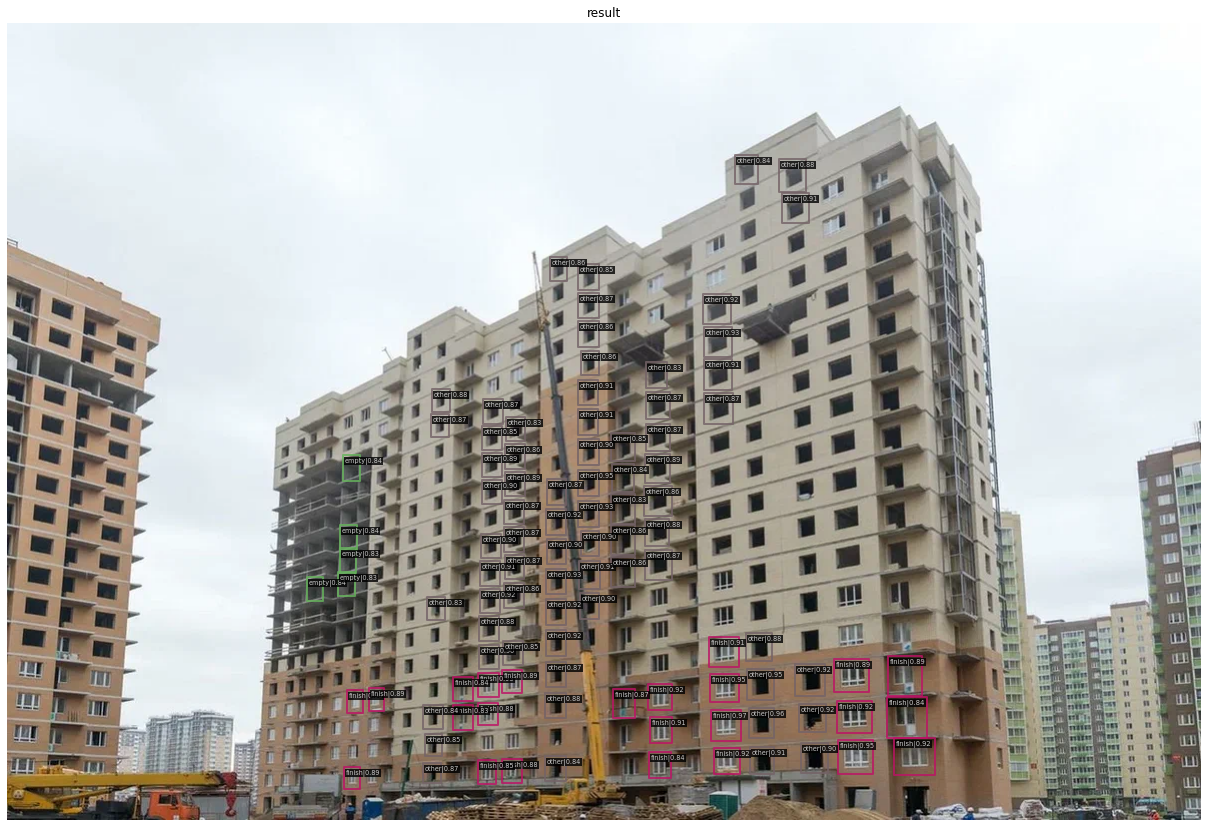

In [8]:
from pathlib import Path
from random import choice
from mmdet.apis import inference_detector, init_detector, show_result_pyplot


# paths2img = [str(p) for p in Path('./dataset/images/').rglob('*.jpg')]
paths2img = [str(p) for p in Path('./dataset/images/').rglob('9611_2018-09-28_Люберцы_Корпус_47_Ве.jpg')]
img = mmcv.imread(choice(paths2img))

model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.3)

In [9]:
data_path = './dataset'

In [11]:
import glob
from PIL import Image
from pathlib import Path
from torch.utils.data import Dataset
import torch

from torchvision.transforms import functional as F


class ReportDetectionDataset(Dataset):
    
    def __init__(self, data_path: str, device: str):
        """
        :param path: path to annotated data.
        """
        
        if data_path[-1] != '/':
            data_path += '/'
        
        self.anns_path = glob.glob(data_path + '**/*.json')[0]
        self.images_path = str(list(Path(data_path).rglob('*.jpg'))[0].parent) + '/'
        self.coco = COCO(self.anns_path)
        self.n = len(self.coco.imgs)
        self.device = device
        # соберем словарь id и названия категорий
        dicts_cats = self.coco.loadCats(self.coco.getCatIds())
        self.id_name_cats = {dict_cat['id']:dict_cat['name'] for dict_cat in dicts_cats}
    
    def image2tensor(self, image: Image.Image, device: str) -> torch.Tensor:
        """
        Checks if image is valid and moves it to the GPU.
        
        :param image: PIL.Image
        :param device: device to run op on
        :return: torch.tensor shape [bs, c, h, w]
        """
        
        if isinstance(image, Image.Image):
            image = np.array(image)
            
        if len(image.shape) != 3 or image.shape[2] != 3:
            raise Exception(
                "'predict' method takes a 3D image as input \
                of shape (H, W, 3). Instead got {}".format(
                    image.shape
                )
            )
            
        return F.to_tensor(image).unsqueeze(0).to(self.device)
    
    def conversion_bbox(self, coco_bbox: list) -> list:
        """
        Convert bbox from coco dataset format to the desired format.
        :from: `[x_topleft, y_topleft, width, height]`
        :to: `[x_topleft, y_topleft, x_bottomright, y_bottomright]`
        """
        x_topleft, y_topleft = coco_bbox[:2]
        w, h = coco_bbox[2], coco_bbox[3]
        x_bottomright = x_topleft + w
        y_bottomright = y_topleft + h
        return [x_topleft, y_topleft, x_bottomright, y_bottomright]
    
    def get_anns(self, dicts_anns: dict) -> dict:
        boxes, brands = [], []
        for dict_ann in dicts_anns:
            
            coco_bbox = dict_ann['bbox']
            bbox = self.conversion_bbox(coco_bbox)
            
            id_brand = dict_ann['category_id']
            brand = self.id_name_cats[id_brand]

            boxes.append(bbox)
            brands.append(brand)

        return {'boxes': np.array(boxes),
                'brands': brands}
    
    def __len__(self):
        return self.n
    
    def __getitem__(self, index):
        # т.к. в coco индексирование начинается с 1, то нужно добавить 1 к индексу
        index += 1
        # получить изображение по индексу
        path2img = self.images_path + self.coco.loadImgs(index)[0]['file_name']
        image = Image.open(path2img)
        ann_img = self.coco.loadImgs(index)
        #print(np.array(image).shape)
        #print(ann_img)
        # получить тензор изображения
        tensor_image = self.image2tensor(image, self.device)
        # получить аннотации к изображению
        id_anns = self.coco.getAnnIds(imgIds=index)
        dicts_anns = self.coco.loadAnns(id_anns)
        #print(dicts_anns)
        # сложить аннотации в вид, который используется в библиотеке logodetection
        gt_detections = self.get_anns(dicts_anns)
                
        return {'path2img': path2img,
                'image': np.array(image),
               'tensor_image': tensor_image,
               'gt_detections': gt_detections}

In [12]:
dataset = ReportDetectionDataset(data_path, 'cuda:2')

loading annotations into memory...
Done (t=0.94s)
creating index...
index created!


In [ ]:
dataset[2]

### Подключить SCNet 2021

**Итог**

В архитектуре, которую хотел подключить ниже, требуется дополнительная аннотация датасета `COCO` называемая [COCO-Stuff](https://github.com/nightrome/cocostuff), где попиксельно размечены все изображения из `COCO`. Данное требование указано в разделе `Dataset` в [конфигах модели](https://github.com/open-mmlab/mmdetection/tree/master/configs/scnet).

Т.к. данной разметки у нас нет, поэтому мы не можем тренировать данную архитектуру.

**Начало**

Самая современная архитектура в `mmdetection` это [SCNet (AAAI'2021)](https://github.com/open-mmlab/mmdetection/blob/c76ab0eb3c637b86c343d8454e07e00cfecc1b78/configs/scnet/README.md). Попробуем запустить обучение на этой модели.

Настройки датасета оставим с предыдущего раздела, здесь будем работать с конфигами модели.

Скачаем веса модели `SCNet`.

In [29]:
!mkdir ../mmdetection/checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/scnet/scnet_r50_fpn_20e_coco/scnet_r50_fpn_20e_coco-a569f645.pth \
      -O ./mmdetection/checkpoints/scnet_r50_fpn_20e_coco-a569f645.pth

mkdir: cannot create directory ‘../mmdetection/checkpoints’: File exists
--2022-03-17 08:38:40--  https://download.openmmlab.com/mmdetection/v2.0/scnet/scnet_r50_fpn_20e_coco/scnet_r50_fpn_20e_coco-a569f645.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.233
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 379567785 (362M) [application/octet-stream]
Saving to: ‘./mmdetection/checkpoints/scnet_r50_fpn_20e_coco-a569f645.pth’

./mmdetection/check 100%[===================>] 361.98M  11.1MB/s    in 55s     

2022-03-17 08:39:37 (6.61 MB/s) - ‘./mmdetection/checkpoints/scnet_r50_fpn_20e_coco-a569f645.pth’ saved [379567785/379567785]



Посмотрим сколько весят веса.

In [30]:
!du -h ./mmdetection/checkpoints/scnet_r50_fpn_20e_coco-a569f645.pth

362M	./mmdetection/checkpoints/scnet_r50_fpn_20e_coco-a569f645.pth


Посмотрим конфигурации `SCNet`.

In [31]:
from mmcv import Config

cfg = Config.fromfile('./mmdetection/configs/scnet/scnet_r50_fpn_20e_coco.py')

In [32]:
cfg.keys()

dict_keys(['dataset_type', 'data_root', 'img_norm_cfg', 'train_pipeline', 'test_pipeline', 'data', 'evaluation', 'optimizer', 'optimizer_config', 'lr_config', 'runner', 'checkpoint_config', 'log_config', 'custom_hooks', 'dist_params', 'log_level', 'load_from', 'resume_from', 'workflow', 'opencv_num_threads', 'mp_start_method', 'model'])

Модель обучалась на датасете `COCO` в котором 80 классов. У нас 2 класса, поэтому необходимо изменить параметры `num_classes` на 2. В данной архитектуре необходимо изменять в трёх головах данный параметр.

In [33]:
cfg['model']

{'type': 'SCNet',
 'backbone': {'type': 'ResNet',
  'depth': 50,
  'num_stages': 4,
  'out_indices': (0, 1, 2, 3),
  'frozen_stages': 1,
  'norm_cfg': {'type': 'BN', 'requires_grad': True},
  'norm_eval': True,
  'style': 'pytorch',
  'init_cfg': {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}},
 'neck': {'type': 'FPN',
  'in_channels': [256, 512, 1024, 2048],
  'out_channels': 256,
  'num_outs': 5},
 'rpn_head': {'type': 'RPNHead',
  'in_channels': 256,
  'feat_channels': 256,
  'anchor_generator': {'type': 'AnchorGenerator',
   'scales': [8],
   'ratios': [0.5, 1.0, 2.0],
   'strides': [4, 8, 16, 32, 64]},
  'bbox_coder': {'type': 'DeltaXYWHBBoxCoder',
   'target_means': [0.0, 0.0, 0.0, 0.0],
   'target_stds': [1.0, 1.0, 1.0, 1.0]},
  'loss_cls': {'type': 'CrossEntropyLoss',
   'use_sigmoid': True,
   'loss_weight': 1.0},
  'loss_bbox': {'type': 'SmoothL1Loss',
   'beta': 0.1111111111111111,
   'loss_weight': 1.0}},
 'roi_head': {'type': 'SCNetRoIHead',
  'num_stages':

In [38]:
from mmdet.apis import set_random_seed

# cfg.dataset_type: название класса датасета, который зарегистрировали выше
cfg.dataset_type = 'GPNL'
cfg.data_root = './dataset/'

cfg.data.train.type = 'GPNL'
#cfg.data.train.data_root = '../data/classification/cup_canister/'
cfg.data.train.ann_file = './dataset/annotations/train_285.json'
cfg.data.train.img_prefix = './dataset/images/'

cfg.data.val.type = 'GPNL'
#cfg.data.val.data_root = '../data/classification/cup_canister/'
cfg.data.val.ann_file = './dataset/annotations/val_15.json'
cfg.data.val.img_prefix = './dataset/images/'

# на тест поставим заглушку, в качестве заглушки будем использовать val датасет
cfg.data.test.type = 'GPNL'
#cfg.data.test.data_root = '../data/classification/cup_canister/'
cfg.data.test.ann_file = './dataset/annotations/val_15.json'
cfg.data.test.img_prefix = './dataset/images/'

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 6
# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = './mmdetection/checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './logs'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

cfg.lr_config = dict(
    policy='step',
    warmup=None,
    warmup_iters=500,
    warmup_ratio=0.001,
    step=[8, 11]
)

# # Change the evaluation metric since we use customized dataset.
# cfg.evaluation.metric = 'mAP'
# # We can set the evaluation interval to reduce the evaluation times
# cfg.evaluation.interval = 12
# # We can set the checkpoint saving interval to reduce the storage cost
# cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = [2]

cfg['data']['workers_per_gpu'] = 0
cfg['data']['samples_per_gpu'] = 1

# We can initialize the logger for training and have a look
# at the final config used for training
# print(f'Config:\n{cfg.pretty_text}')

AttributeError: 'list' object has no attribute 'num_classes'

In [39]:
from mmdet.apis import set_random_seed

# cfg.dataset_type: название класса датасета, который зарегистрировали выше
cfg.dataset_type = 'GPNL'
cfg.data_root = './dataset/'

cfg.data.train.type = 'GPNL'
#cfg.data.train.data_root = '../data/classification/cup_canister/'
cfg.data.train.ann_file = './dataset/annotations/train_285.json'
cfg.data.train.img_prefix = './dataset/images/'

cfg.data.val.type = 'GPNL'
#cfg.data.val.data_root = '../data/classification/cup_canister/'
cfg.data.val.ann_file = './dataset/annotations/val_15.json'
cfg.data.val.img_prefix = './dataset/images/'

# на тест поставим заглушку, в качестве заглушки будем использовать val датасет
cfg.data.test.type = 'GPNL'
#cfg.data.test.data_root = '../data/classification/cup_canister/'
cfg.data.test.ann_file = './dataset/annotations/val_15.json'
cfg.data.test.img_prefix = './dataset/images/'

# modify num classes of the model in box head
# cfg.model.roi_head.bbox_head[0].num_classes = 6
# cfg.model.roi_head.bbox_head[1].num_classes = 6
# cfg.model.roi_head.bbox_head[2].num_classes = 6

cfg.model.roi_head.mask_head.num_classes = 6
# cfg.model.roi_head.glbctx_head.num_classes = 6

# set model
cfg.load_from = './mmdetection/checkpoints/scnet_r50_fpn_20e_coco-a569f645.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tests'

cfg.lr_config = dict(
    policy='step',
    warmup=None,
    warmup_iters=500,
    warmup_ratio=0.001,
    step=[8, 11]
)

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = [2]

cfg['data']['workers_per_gpu'] = 0

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
dataset_type = 'GPNL'
data_root = './dataset/'
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='LoadAnnotations', with_bbox=True, with_mask=True, with_seg=True),
    dict(type='Resize', img_scale=(1333, 800), keep_ratio=True),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(
        type='Normalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        to_rgb=True),
    dict(type='Pad', size_divisor=32),
    dict(type='SegRescale', scale_factor=0.125),
    dict(type='DefaultFormatBundle'),
    dict(
        type='Collect',
        keys=['img', 'gt_bboxes', 'gt_labels', 'gt_masks', 'gt_semantic_seg'])
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1333, 800),
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=Tr

In [40]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector


# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

loading annotations into memory...
Done (t=1.02s)
creating index...
index created!


2022-03-17 12:19:20,402 - mmdet - INFO - load checkpoint from local path: ./mmdetection/checkpoints/scnet_r50_fpn_20e_coco-a569f645.pth


loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


2022-03-17 12:19:21,424 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.0.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([7, 1024]).
size mismatch for roi_head.bbox_head.0.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([7]).
size mismatch for roi_head.bbox_head.1.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([7, 1024]).
size mismatch for roi_head.bbox_head.1.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([7]).
size mismatch for roi_head.bbox_head.2.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([7, 1024]).
size mismatch for roi_head.bbox_head.2.fc_cls.bias: copying 

IndexError: list index out of range

### Подключение других моделей

В библиотеке `mmdetection` у каждой архитектуры есть таблица в которой указаны основные параметры и метрики модели. Посмотре все, выделил несколько самые лучшие в соотношении предсказательная мощность/вес.

1. [Mask RCNN (2017)](https://github.com/open-mmlab/mmdetection/tree/master/configs/mask_rcnn).

2. [VFNet (2020)](https://github.com/open-mmlab/mmdetection/blob/master/configs/vfnet/README.md).

3. [PAA (2020)](https://github.com/open-mmlab/mmdetection/blob/master/configs/paa/README.md).

4. [Generalized Focal Loss (NeurIPS'2020)](https://github.com/open-mmlab/mmdetection/blob/master/configs/gfl/README.md).

Самая мощная это `VFNet`, попробуем подключить её.

Настройки датасета оставим с предыдущего раздела, здесь будем работать с конфигами модели.

In [93]:
!wget -c https://download.openmmlab.com/mmdetection/v2.0/vfnet/vfnet_r50_fpn_mdconv_c3-c5_mstrain_2x_coco/vfnet_r50_fpn_mdconv_c3-c5_mstrain_2x_coco_20201027pth-6879c318.pth \
      -O ../mmdetection/checkpoints/vfnet_r50_fpn_mdconv_c3-c5_mstrain_2x_coco_20201027pth-6879c318.pth

--2021-12-27 13:32:47--  https://download.openmmlab.com/mmdetection/v2.0/vfnet/vfnet_r50_fpn_mdconv_c3-c5_mstrain_2x_coco/vfnet_r50_fpn_mdconv_c3-c5_mstrain_2x_coco_20201027pth-6879c318.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.233
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135895002 (130M) [application/octet-stream]
Saving to: ‘../mmdetection/checkpoints/vfnet_r50_fpn_mdconv_c3-c5_mstrain_2x_coco_20201027pth-6879c318.pth’

../mmdetection/chec 100%[===================>] 129.60M  8.80MB/s    in 14s     

2021-12-27 13:33:02 (9.28 MB/s) - ‘../mmdetection/checkpoints/vfnet_r50_fpn_mdconv_c3-c5_mstrain_2x_coco_20201027pth-6879c318.pth’ saved [135895002/135895002]



In [94]:
!du -h ../mmdetection/checkpoints/vfnet_r50_fpn_mdconv_c3-c5_mstrain_2x_coco_20201027pth-6879c318.pth

130M	../mmdetection/checkpoints/vfnet_r50_fpn_mdconv_c3-c5_mstrain_2x_coco_20201027pth-6879c318.pth


In [95]:
from mmcv import Config

cfg = Config.fromfile('../mmdetection/configs/vfnet/vfnet_r50_fpn_mdconv_c3-c5_mstrain_2x_coco.py')

In [96]:
cfg.keys()

dict_keys(['dataset_type', 'data_root', 'img_norm_cfg', 'train_pipeline', 'test_pipeline', 'data', 'evaluation', 'optimizer', 'optimizer_config', 'lr_config', 'runner', 'checkpoint_config', 'log_config', 'custom_hooks', 'dist_params', 'log_level', 'load_from', 'resume_from', 'workflow', 'model'])

Необходимо изменить `num_classes` только в `bbox_hed`.

In [97]:
cfg.model

{'type': 'VFNet',
 'backbone': {'type': 'ResNet',
  'depth': 50,
  'num_stages': 4,
  'out_indices': (0, 1, 2, 3),
  'frozen_stages': 1,
  'norm_cfg': {'type': 'BN', 'requires_grad': True},
  'norm_eval': True,
  'style': 'pytorch',
  'init_cfg': {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'},
  'dcn': {'type': 'DCNv2', 'deform_groups': 1, 'fallback_on_stride': False},
  'stage_with_dcn': (False, True, True, True)},
 'neck': {'type': 'FPN',
  'in_channels': [256, 512, 1024, 2048],
  'out_channels': 256,
  'start_level': 1,
  'add_extra_convs': 'on_output',
  'num_outs': 5,
  'relu_before_extra_convs': True},
 'bbox_head': {'type': 'VFNetHead',
  'num_classes': 80,
  'in_channels': 256,
  'stacked_convs': 3,
  'feat_channels': 256,
  'strides': [8, 16, 32, 64, 128],
  'center_sampling': False,
  'dcn_on_last_conv': True,
  'use_atss': True,
  'use_vfl': True,
  'loss_cls': {'type': 'VarifocalLoss',
   'use_sigmoid': True,
   'alpha': 0.75,
   'gamma': 2.0,
   'iou_weight

In [100]:
from mmdet.apis import set_random_seed

# cfg.dataset_type: название класса датасета, который зарегистрировали выше
cfg.dataset_type = 'GPNL'
cfg.data_root = '../data/classification/cup_canister/'

cfg.data.train.type = 'GPNL'
#cfg.data.train.data_root = '../data/classification/cup_canister/'
cfg.data.train.ann_file = '../data/classification/cup_canister/annotations/instances_train.json'
cfg.data.train.img_prefix = '../data/classification/cup_canister/train_images/'

cfg.data.val.type = 'GPNL'
#cfg.data.val.data_root = '../data/classification/cup_canister/'
cfg.data.val.ann_file = '../data/classification/cup_canister/annotations/instances_val.json'
cfg.data.val.img_prefix = '../data/classification/cup_canister/val_images/'

# на тест поставим заглушку, в качестве заглушки будем использовать val датасет
cfg.data.test.type = 'GPNL'
#cfg.data.test.data_root = '../data/classification/cup_canister/'
cfg.data.test.ann_file = '../data/classification/cup_canister/annotations/instances_val.json'
cfg.data.test.img_prefix = '../data/classification/cup_canister/val_images/'

# modify num classes of the model in box head
cfg.model.bbox_head.num_classes = 2

# set model
cfg.load_from = '../mmdetection/checkpoints/vfnet_r50_fpn_mdconv_c3-c5_mstrain_2x_coco_20201027pth-6879c318.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

cfg['data']['workers_per_gpu'] = 0

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
dataset_type = 'GPNL'
data_root = '../data/classification/cup_canister/'
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='Resize',
        img_scale=[(1333, 480), (1333, 960)],
        multiscale_mode='range',
        keep_ratio=True),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(
        type='Normalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        to_rgb=True),
    dict(type='Pad', size_divisor=32),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels'])
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1333, 800),
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip

In [101]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector


# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


2021-12-27 13:38:59,732 - mmdet - INFO - load checkpoint from local path: ../mmdetection/checkpoints/vfnet_r50_fpn_mdconv_c3-c5_mstrain_2x_coco_20201027pth-6879c318.pth


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


2021-12-27 13:38:59,955 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head.vfnet_cls.weight: copying a param with shape torch.Size([80, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([2, 256, 3, 3]).
size mismatch for bbox_head.vfnet_cls.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([2]).
2021-12-27 13:38:59,957 - mmdet - INFO - Start running, host: jovyan@a5a7997ba860, work_dir: /home/jovyan/work/gpnl/notebooks/tutorial_exps
2021-12-27 13:38:59,958 - mmdet - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) NumClassCheckHook    

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 6.4 task/s, elapsed: 8s, ETA:     0s

2021-12-27 13:40:23,970 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-12-27 13:40:24,585 - mmdet - INFO - Epoch(val) [1][52]	bbox_mAP: 0.0000, bbox_mAP_50: 0.0010, bbox_mAP_75: 0.0000, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.0000, bbox_mAP_l: 0.0000, bbox_mAP_copypaste: 0.000 0.001 0.000 -1.000 0.000 0.000


DONE (t=0.37s).
Accumulating evaluation results...
DONE (t=0.19s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.001
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.047
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.047
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.047
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 |

2021-12-27 13:41:06,936 - mmdet - INFO - Epoch [2][50/87]	lr: 3.448e-03, eta: 0:20:13, time: 0.845, data_time: 0.146, memory: 4293, loss_cls: 2.7804, loss_bbox: 0.5606, loss_bbox_rf: 0.7471, loss: 4.0881
2021-12-27 13:41:35,621 - mmdet - INFO - Saving checkpoint at 2 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 7.3 task/s, elapsed: 7s, ETA:     0s

2021-12-27 13:41:44,668 - mmdet - INFO - Evaluating bbox...
2021-12-27 13:41:44,670 - mmdet - ERROR - The testing results of the whole dataset is empty.
2021-12-27 13:41:44,672 - mmdet - INFO - Epoch(val) [2][52]	


Loading and preparing results...


2021-12-27 13:42:24,935 - mmdet - INFO - Epoch [3][50/87]	lr: 5.014e-03, eta: 0:17:23, time: 0.803, data_time: 0.133, memory: 4293, loss_cls: 2.7959, loss_bbox: 0.5774, loss_bbox_rf: 0.7706, loss: 4.1439
2021-12-27 13:42:55,100 - mmdet - INFO - Saving checkpoint at 3 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 7.2 task/s, elapsed: 7s, ETA:     0s

2021-12-27 13:43:03,649 - mmdet - INFO - Evaluating bbox...
2021-12-27 13:43:03,651 - mmdet - ERROR - The testing results of the whole dataset is empty.
2021-12-27 13:43:03,653 - mmdet - INFO - Epoch(val) [3][52]	


Loading and preparing results...


2021-12-27 13:43:44,420 - mmdet - INFO - Epoch [4][50/87]	lr: 6.580e-03, eta: 0:15:49, time: 0.814, data_time: 0.128, memory: 4377, loss_cls: 2.0676, loss_bbox: 0.5927, loss_bbox_rf: 0.7877, loss: 3.4480
2021-12-27 13:44:11,983 - mmdet - INFO - Saving checkpoint at 4 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 7.1 task/s, elapsed: 7s, ETA:     0s

2021-12-27 13:44:21,396 - mmdet - INFO - Evaluating bbox...
2021-12-27 13:44:21,398 - mmdet - ERROR - The testing results of the whole dataset is empty.
2021-12-27 13:44:21,399 - mmdet - INFO - Epoch(val) [4][52]	


Loading and preparing results...


2021-12-27 13:45:03,071 - mmdet - INFO - Epoch [5][50/87]	lr: 8.146e-03, eta: 0:14:41, time: 0.831, data_time: 0.135, memory: 4377, loss_cls: 1.4688, loss_bbox: 0.5672, loss_bbox_rf: 0.7573, loss: 2.7933
2021-12-27 13:45:33,907 - mmdet - INFO - Saving checkpoint at 5 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 7.4 task/s, elapsed: 7s, ETA:     0s

2021-12-27 13:45:42,663 - mmdet - INFO - Evaluating bbox...
2021-12-27 13:45:42,665 - mmdet - ERROR - The testing results of the whole dataset is empty.
2021-12-27 13:45:42,667 - mmdet - INFO - Epoch(val) [5][52]	


Loading and preparing results...


2021-12-27 13:46:25,703 - mmdet - INFO - Epoch [6][50/87]	lr: 9.712e-03, eta: 0:13:48, time: 0.859, data_time: 0.138, memory: 4377, loss_cls: 1.4017, loss_bbox: 0.5772, loss_bbox_rf: 0.7706, loss: 2.7495
2021-12-27 13:46:55,378 - mmdet - INFO - Saving checkpoint at 6 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 6.8 task/s, elapsed: 8s, ETA:     0s

2021-12-27 13:47:05,050 - mmdet - INFO - Evaluating bbox...
2021-12-27 13:47:05,052 - mmdet - ERROR - The testing results of the whole dataset is empty.
2021-12-27 13:47:05,054 - mmdet - INFO - Epoch(val) [6][52]	


Loading and preparing results...


2021-12-27 13:47:46,460 - mmdet - INFO - Epoch [7][50/87]	lr: 1.000e-02, eta: 0:12:53, time: 0.827, data_time: 0.141, memory: 4377, loss_cls: 1.3693, loss_bbox: 0.5846, loss_bbox_rf: 0.7777, loss: 2.7316
2021-12-27 13:48:15,493 - mmdet - INFO - Saving checkpoint at 7 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 6.9 task/s, elapsed: 8s, ETA:     0s

2021-12-27 13:48:25,194 - mmdet - INFO - Evaluating bbox...
2021-12-27 13:48:25,196 - mmdet - ERROR - The testing results of the whole dataset is empty.
2021-12-27 13:48:25,198 - mmdet - INFO - Epoch(val) [7][52]	


Loading and preparing results...


2021-12-27 13:49:06,517 - mmdet - INFO - Epoch [8][50/87]	lr: 1.000e-02, eta: 0:12:02, time: 0.825, data_time: 0.134, memory: 4377, loss_cls: 1.3852, loss_bbox: 0.5579, loss_bbox_rf: 0.7402, loss: 2.6833
2021-12-27 13:49:35,038 - mmdet - INFO - Saving checkpoint at 8 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 6.4 task/s, elapsed: 8s, ETA:     0s

2021-12-27 13:49:45,383 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-12-27 13:49:46,067 - mmdet - INFO - Epoch(val) [8][52]	bbox_mAP: 0.0020, bbox_mAP_50: 0.0090, bbox_mAP_75: 0.0000, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.0000, bbox_mAP_l: 0.0030, bbox_mAP_copypaste: 0.002 0.009 0.000 -1.000 0.000 0.003


DONE (t=0.45s).
Accumulating evaluation results...
DONE (t=0.17s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.009
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.003
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.076
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.076
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.076
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 |

2021-12-27 13:50:25,720 - mmdet - INFO - Epoch [9][50/87]	lr: 1.000e-02, eta: 0:11:10, time: 0.791, data_time: 0.134, memory: 4377, loss_cls: 1.4821, loss_bbox: 0.5798, loss_bbox_rf: 0.7740, loss: 2.8360
2021-12-27 13:50:55,204 - mmdet - INFO - Saving checkpoint at 9 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 6.8 task/s, elapsed: 8s, ETA:     0s

2021-12-27 13:51:05,026 - mmdet - INFO - Evaluating bbox...
2021-12-27 13:51:05,028 - mmdet - ERROR - The testing results of the whole dataset is empty.
2021-12-27 13:51:05,030 - mmdet - INFO - Epoch(val) [9][52]	


Loading and preparing results...


2021-12-27 13:51:46,101 - mmdet - INFO - Epoch [10][50/87]	lr: 1.000e-02, eta: 0:10:23, time: 0.820, data_time: 0.139, memory: 4377, loss_cls: 1.3717, loss_bbox: 0.5691, loss_bbox_rf: 0.7556, loss: 2.6964
2021-12-27 13:52:15,324 - mmdet - INFO - Saving checkpoint at 10 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 6.5 task/s, elapsed: 8s, ETA:     0s

2021-12-27 13:52:25,366 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-12-27 13:52:26,228 - mmdet - INFO - Epoch(val) [10][52]	bbox_mAP: 0.0020, bbox_mAP_50: 0.0100, bbox_mAP_75: 0.0000, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.0000, bbox_mAP_l: 0.0020, bbox_mAP_copypaste: 0.002 0.010 0.000 -1.000 0.000 0.002


DONE (t=0.64s).
Accumulating evaluation results...
DONE (t=0.17s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.010
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.002
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.110
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.110
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.110
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 |

2021-12-27 13:53:09,712 - mmdet - INFO - Epoch [11][50/87]	lr: 1.000e-02, eta: 0:09:40, time: 0.868, data_time: 0.157, memory: 4377, loss_cls: 1.1776, loss_bbox: 0.5344, loss_bbox_rf: 0.7102, loss: 2.4222
2021-12-27 13:53:39,516 - mmdet - INFO - Saving checkpoint at 11 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 6.3 task/s, elapsed: 8s, ETA:     0s

2021-12-27 13:53:49,994 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.31s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-12-27 13:53:50,990 - mmdet - INFO - Epoch(val) [11][52]	bbox_mAP: 0.0270, bbox_mAP_50: 0.0800, bbox_mAP_75: 0.0100, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.0090, bbox_mAP_l: 0.0280, bbox_mAP_copypaste: 0.027 0.080 0.010 -1.000 0.009 0.028


DONE (t=0.48s).
Accumulating evaluation results...
DONE (t=0.17s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.027
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.080
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.010
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.009
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.028
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.296
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.296
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.296
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.133
 Average Recall     (AR) @[ IoU=0.50:0.95 |

2021-12-27 13:54:34,243 - mmdet - INFO - Epoch [12][50/87]	lr: 1.000e-02, eta: 0:08:57, time: 0.863, data_time: 0.152, memory: 4377, loss_cls: 1.1885, loss_bbox: 0.5405, loss_bbox_rf: 0.7124, loss: 2.4414
2021-12-27 13:55:03,768 - mmdet - INFO - Saving checkpoint at 12 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 6.7 task/s, elapsed: 8s, ETA:     0s

2021-12-27 13:55:13,470 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-12-27 13:55:14,183 - mmdet - INFO - Epoch(val) [12][52]	bbox_mAP: 0.0080, bbox_mAP_50: 0.0290, bbox_mAP_75: 0.0010, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.0000, bbox_mAP_l: 0.0080, bbox_mAP_copypaste: 0.008 0.029 0.001 -1.000 0.000 0.008


DONE (t=0.49s).
Accumulating evaluation results...
DONE (t=0.17s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.008
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.029
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.008
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.162
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.162
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.162
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 |

2021-12-27 13:55:56,199 - mmdet - INFO - Epoch [13][50/87]	lr: 1.000e-02, eta: 0:08:12, time: 0.838, data_time: 0.137, memory: 4377, loss_cls: 1.1966, loss_bbox: 0.5863, loss_bbox_rf: 0.7790, loss: 2.5619
2021-12-27 13:56:25,904 - mmdet - INFO - Saving checkpoint at 13 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 6.8 task/s, elapsed: 8s, ETA:     0s

2021-12-27 13:56:35,106 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-12-27 13:56:35,803 - mmdet - INFO - Epoch(val) [13][52]	bbox_mAP: 0.0110, bbox_mAP_50: 0.0390, bbox_mAP_75: 0.0020, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.0000, bbox_mAP_l: 0.0110, bbox_mAP_copypaste: 0.011 0.039 0.002 -1.000 0.000 0.011


DONE (t=0.51s).
Accumulating evaluation results...
DONE (t=0.14s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.039
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.011
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.177
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.177
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.177
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 |

2021-12-27 13:57:18,319 - mmdet - INFO - Epoch [14][50/87]	lr: 1.000e-02, eta: 0:07:28, time: 0.849, data_time: 0.133, memory: 4377, loss_cls: 1.1525, loss_bbox: 0.5587, loss_bbox_rf: 0.7434, loss: 2.4546
2021-12-27 13:57:48,477 - mmdet - INFO - Saving checkpoint at 14 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 6.7 task/s, elapsed: 8s, ETA:     0s

2021-12-27 13:57:57,858 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-12-27 13:57:58,611 - mmdet - INFO - Epoch(val) [14][52]	bbox_mAP: 0.0110, bbox_mAP_50: 0.0410, bbox_mAP_75: 0.0020, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.0000, bbox_mAP_l: 0.0120, bbox_mAP_copypaste: 0.011 0.041 0.002 -1.000 0.000 0.012


DONE (t=0.52s).
Accumulating evaluation results...
DONE (t=0.17s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.041
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.012
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.279
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.279
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.279
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 |

2021-12-27 13:58:39,870 - mmdet - INFO - Epoch [15][50/87]	lr: 1.000e-02, eta: 0:06:44, time: 0.823, data_time: 0.137, memory: 4377, loss_cls: 1.1487, loss_bbox: 0.5336, loss_bbox_rf: 0.7126, loss: 2.3950
2021-12-27 13:59:09,478 - mmdet - INFO - Saving checkpoint at 15 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 6.9 task/s, elapsed: 8s, ETA:     0s

2021-12-27 13:59:18,257 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-12-27 13:59:19,325 - mmdet - INFO - Epoch(val) [15][52]	bbox_mAP: 0.0240, bbox_mAP_50: 0.0800, bbox_mAP_75: 0.0050, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.0000, bbox_mAP_l: 0.0240, bbox_mAP_copypaste: 0.024 0.080 0.005 -1.000 0.000 0.024


DONE (t=0.55s).
Accumulating evaluation results...
DONE (t=0.17s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.024
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.080
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.005
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.024
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.275
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.275
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.275
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 |

2021-12-27 14:00:03,309 - mmdet - INFO - Epoch [16][50/87]	lr: 1.000e-02, eta: 0:06:02, time: 0.878, data_time: 0.152, memory: 4377, loss_cls: 1.0688, loss_bbox: 0.5164, loss_bbox_rf: 0.6772, loss: 2.2623
2021-12-27 14:00:32,948 - mmdet - INFO - Saving checkpoint at 16 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 6.5 task/s, elapsed: 8s, ETA:     0s

2021-12-27 14:00:42,431 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-12-27 14:00:43,183 - mmdet - INFO - Epoch(val) [16][52]	bbox_mAP: 0.0160, bbox_mAP_50: 0.0580, bbox_mAP_75: 0.0040, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.0000, bbox_mAP_l: 0.0180, bbox_mAP_copypaste: 0.016 0.058 0.004 -1.000 0.000 0.018


DONE (t=0.52s).
Accumulating evaluation results...
DONE (t=0.18s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.016
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.058
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.018
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.284
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.284
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.284
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 |

2021-12-27 14:01:24,768 - mmdet - INFO - Epoch [17][50/87]	lr: 1.000e-03, eta: 0:05:18, time: 0.830, data_time: 0.141, memory: 4377, loss_cls: 1.0769, loss_bbox: 0.4338, loss_bbox_rf: 0.5599, loss: 2.0706
2021-12-27 14:01:55,454 - mmdet - INFO - Saving checkpoint at 17 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 6.7 task/s, elapsed: 8s, ETA:     0s

2021-12-27 14:02:04,783 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-12-27 14:02:05,441 - mmdet - INFO - Epoch(val) [17][52]	bbox_mAP: 0.0220, bbox_mAP_50: 0.0630, bbox_mAP_75: 0.0100, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.0000, bbox_mAP_l: 0.0230, bbox_mAP_copypaste: 0.022 0.063 0.010 -1.000 0.000 0.023


DONE (t=0.44s).
Accumulating evaluation results...
DONE (t=0.17s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.063
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.010
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.023
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.283
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.283
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.283
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.017
 Average Recall     (AR) @[ IoU=0.50:0.95 |

2021-12-27 14:02:47,184 - mmdet - INFO - Epoch [18][50/87]	lr: 1.000e-03, eta: 0:04:35, time: 0.833, data_time: 0.145, memory: 4377, loss_cls: 1.0132, loss_bbox: 0.4352, loss_bbox_rf: 0.5648, loss: 2.0132
2021-12-27 14:03:16,449 - mmdet - INFO - Saving checkpoint at 18 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 7.1 task/s, elapsed: 7s, ETA:     0s

2021-12-27 14:03:25,509 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-12-27 14:03:26,203 - mmdet - INFO - Epoch(val) [18][52]	bbox_mAP: 0.0280, bbox_mAP_50: 0.0820, bbox_mAP_75: 0.0100, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.0000, bbox_mAP_l: 0.0310, bbox_mAP_copypaste: 0.028 0.082 0.010 -1.000 0.000 0.031


DONE (t=0.46s).
Accumulating evaluation results...
DONE (t=0.17s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.028
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.082
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.010
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.031
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.289
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.289
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.289
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 |

2021-12-27 14:04:07,299 - mmdet - INFO - Epoch [19][50/87]	lr: 1.000e-03, eta: 0:03:51, time: 0.820, data_time: 0.130, memory: 4377, loss_cls: 1.0694, loss_bbox: 0.4233, loss_bbox_rf: 0.5558, loss: 2.0484
2021-12-27 14:04:35,188 - mmdet - INFO - Saving checkpoint at 19 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 7.1 task/s, elapsed: 7s, ETA:     0s

2021-12-27 14:04:43,779 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-12-27 14:04:44,445 - mmdet - INFO - Epoch(val) [19][52]	bbox_mAP: 0.0270, bbox_mAP_50: 0.0870, bbox_mAP_75: 0.0150, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.0000, bbox_mAP_l: 0.0290, bbox_mAP_copypaste: 0.027 0.087 0.015 -1.000 0.000 0.029


DONE (t=0.45s).
Accumulating evaluation results...
DONE (t=0.16s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.027
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.087
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.015
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.029
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.273
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.273
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.273
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 |

2021-12-27 14:05:25,880 - mmdet - INFO - Epoch [20][50/87]	lr: 1.000e-03, eta: 0:03:08, time: 0.826, data_time: 0.129, memory: 4377, loss_cls: 1.0600, loss_bbox: 0.4163, loss_bbox_rf: 0.5428, loss: 2.0191
2021-12-27 14:05:54,106 - mmdet - INFO - Saving checkpoint at 20 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 6.8 task/s, elapsed: 8s, ETA:     0s

2021-12-27 14:06:02,942 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-12-27 14:06:03,599 - mmdet - INFO - Epoch(val) [20][52]	bbox_mAP: 0.0230, bbox_mAP_50: 0.0840, bbox_mAP_75: 0.0100, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.0000, bbox_mAP_l: 0.0250, bbox_mAP_copypaste: 0.023 0.084 0.010 -1.000 0.000 0.025


DONE (t=0.43s).
Accumulating evaluation results...
DONE (t=0.17s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.023
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.084
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.010
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.025
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.245
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.245
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.245
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 |

2021-12-27 14:06:44,588 - mmdet - INFO - Epoch [21][50/87]	lr: 1.000e-03, eta: 0:02:25, time: 0.817, data_time: 0.134, memory: 4377, loss_cls: 1.0069, loss_bbox: 0.4137, loss_bbox_rf: 0.5345, loss: 1.9552
2021-12-27 14:07:14,883 - mmdet - INFO - Saving checkpoint at 21 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 6.9 task/s, elapsed: 8s, ETA:     0s

2021-12-27 14:07:24,278 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-12-27 14:07:25,002 - mmdet - INFO - Epoch(val) [21][52]	bbox_mAP: 0.0300, bbox_mAP_50: 0.1060, bbox_mAP_75: 0.0150, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.0000, bbox_mAP_l: 0.0330, bbox_mAP_copypaste: 0.030 0.106 0.015 -1.000 0.000 0.033


DONE (t=0.50s).
Accumulating evaluation results...
DONE (t=0.16s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.030
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.106
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.015
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.033
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.261
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.261
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.261
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 |

2021-12-27 14:08:06,706 - mmdet - INFO - Epoch [22][50/87]	lr: 1.000e-03, eta: 0:01:43, time: 0.832, data_time: 0.140, memory: 4377, loss_cls: 1.0461, loss_bbox: 0.4276, loss_bbox_rf: 0.5623, loss: 2.0360
2021-12-27 14:08:37,442 - mmdet - INFO - Saving checkpoint at 22 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 6.7 task/s, elapsed: 8s, ETA:     0s

2021-12-27 14:08:46,784 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-12-27 14:08:47,458 - mmdet - INFO - Epoch(val) [22][52]	bbox_mAP: 0.0270, bbox_mAP_50: 0.0890, bbox_mAP_75: 0.0140, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.0000, bbox_mAP_l: 0.0300, bbox_mAP_copypaste: 0.027 0.089 0.014 -1.000 0.000 0.030


DONE (t=0.45s).
Accumulating evaluation results...
DONE (t=0.17s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.027
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.089
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.014
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.030
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.269
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.269
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.269
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 |

2021-12-27 14:09:30,513 - mmdet - INFO - Epoch [23][50/87]	lr: 1.000e-04, eta: 0:01:00, time: 0.859, data_time: 0.145, memory: 4377, loss_cls: 1.0171, loss_bbox: 0.4108, loss_bbox_rf: 0.5246, loss: 1.9524
2021-12-27 14:09:59,775 - mmdet - INFO - Saving checkpoint at 23 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 7.0 task/s, elapsed: 7s, ETA:     0s

2021-12-27 14:10:08,726 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-12-27 14:10:09,404 - mmdet - INFO - Epoch(val) [23][52]	bbox_mAP: 0.0290, bbox_mAP_50: 0.0960, bbox_mAP_75: 0.0140, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.0000, bbox_mAP_l: 0.0310, bbox_mAP_copypaste: 0.029 0.096 0.014 -1.000 0.000 0.031


DONE (t=0.45s).
Accumulating evaluation results...
DONE (t=0.17s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.029
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.096
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.014
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.031
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.279
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.279
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.279
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 |

2021-12-27 14:10:52,368 - mmdet - INFO - Epoch [24][50/87]	lr: 1.000e-04, eta: 0:00:18, time: 0.857, data_time: 0.138, memory: 4377, loss_cls: 1.0002, loss_bbox: 0.4027, loss_bbox_rf: 0.5184, loss: 1.9213
2021-12-27 14:11:22,686 - mmdet - INFO - Saving checkpoint at 24 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 52/52, 6.9 task/s, elapsed: 8s, ETA:     0s

2021-12-27 14:11:31,847 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-12-27 14:11:32,756 - mmdet - INFO - Epoch(val) [24][52]	bbox_mAP: 0.0300, bbox_mAP_50: 0.0960, bbox_mAP_75: 0.0140, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.0000, bbox_mAP_l: 0.0320, bbox_mAP_copypaste: 0.030 0.096 0.014 -1.000 0.000 0.032


DONE (t=0.45s).
Accumulating evaluation results...
DONE (t=0.17s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.030
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.096
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.014
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.032
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.276
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.276
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.276
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 |

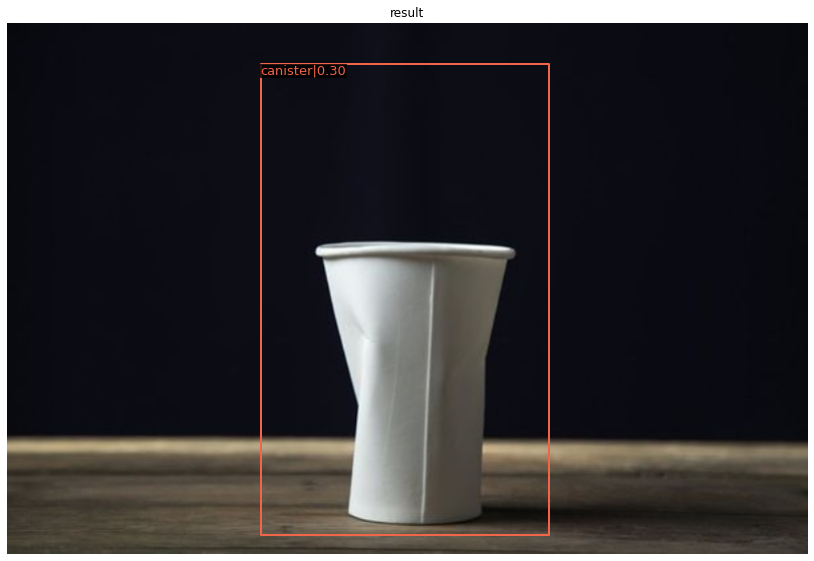

In [102]:
from pathlib import Path
from random import choice
from mmdet.apis import inference_detector, init_detector, show_result_pyplot


paths2img = [str(p) for p in Path('../data/classification/cup_canister/val_images/').rglob('*.jpg')]

img = mmcv.imread(choice(paths2img))

model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result)

Видим, что предсказывает плохо! Почему?

У `Mask RCNN` `loss` был 0.035, у `VFNet` 1.92. Если посмотрим [Readme.dm](https://github.com/open-mmlab/mmdetection/tree/master/configs/mask_rcnn) у `Mask RCNN`, то можно найти раздел `Pre-trained Models`, откуда мы взяли веса. А у других архитектур такого раздела нет, есть только `Results and models`. По всей видимости в разделе `Results and models` находятся не предобученные модели.

Поэтому есть реализованные архитектуры, но они не предобученны и ими из коробки пользоваться нельзя. Чтобы проверить данную гипотезу, можно загрузить модель и загрузить демо изображение, посмотреть, что она предскажет.

In [104]:
device = 'cuda:2'

from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Choose to use a config and initialize the detector
config = '../mmdetection/configs/vfnet/vfnet_r50_fpn_mdconv_c3-c5_mstrain_2x_coco.py'
# Setup a checkpoint file to load
checkpoint = '../mmdetection/checkpoints/vfnet_r50_fpn_mdconv_c3-c5_mstrain_2x_coco_20201027pth-6879c318.pth'
# initialize the detector
model = init_detector(config, checkpoint, device=device)

load checkpoint from local path: ../mmdetection/checkpoints/vfnet_r50_fpn_mdconv_c3-c5_mstrain_2x_coco_20201027pth-6879c318.pth


In [107]:
# Use the detector to do inference
img = '../mmdetection/demo/demo.jpg'
result = inference_detector(model, img)

Гипотеза не подтвердилась! Модель обучена, т.к. на демо изображении прекрасно детектирует!

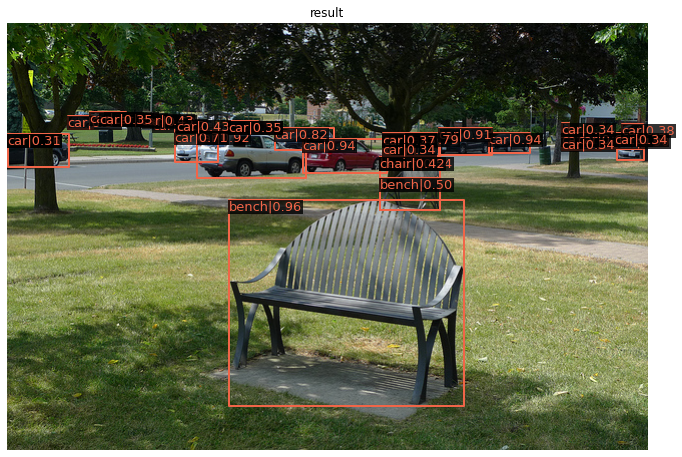

In [108]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)